<a href="https://colab.research.google.com/github/ednavivianasegura/Curso_PLN/blob/main/PLN_EDNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Clonar carpeta Github (Para acceder al dataset y a las distintas gráficas) { form-width: "5%", display-mode: "form" }
import os
# Clona el repositorio
try:
    !git clone https://github.com/ednavivianasegura/Curso_PLN.git
except:
    pass

# Cambiar al directorio "Curso_PLN"
os.chdir("Curso_PLN")

Cloning into 'Curso_PLN'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 255 (delta 162), reused 127 (delta 118), pack-reused 79
Receiving objects: 100% (255/255), 16.91 MiB | 28.72 MiB/s, done.
Resolving deltas: 100% (201/201), done.


***

<center>
<img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/Portada.png?raw=1" alt="portada" width="50%" height="50%">  
</center>

In [ ]:
# @title Librerías Necesarias durante todo el proceso { display-mode: "form" }
import nltk
import networkx as nx
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk import pos_tag
import wordcloud
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import random
from statistics import median
from scipy.stats import norm
from nltk.probability import FreqDist



## ¿Qué es el procesamiento del lenguale natural (PLN)?

Supongamos que disponemos del siguiente texto:

*Natural Language Processing (NLP) is an interdisciplinary field that combines statistics, mathematics, and machine learning techniques to analyze and understand human language. In NLP, words, tokens, and their frequency play a crucial role in building models for language inference.
The foundation of Natural Language Processing lies in understanding the nominal, ordinal, and categorical aspects of language. By employing sophisticated algorithms, NLP systems can decipher the semantics and syntax of words and sentences. In NLP, the power of machine learning models is harnessed to process vast amounts of textual data, enabling tasks such as sentiment analysis, text summarization, and information extraction. Through the application of advanced algorithms, NLP practitioners strive to enhance the accuracy and efficiency of language processing systems.
Statistics and mathematics form the backbone of Natural Language Processing, providing the theoretical framework for modeling linguistic phenomena and deriving meaningful insights from textual data.
By leveraging statistical techniques, NLP algorithms can identify patterns, trends, and correlations within language corpora. In essence, Natural Language Processing is a multifaceted discipline that draws upon diverse domains such as linguistics, computer science, and artificial intelligence.
By exploring the intricate interplay between words, semantics, and context, NLP researchers continue to push the boundaries of language understanding and machine intelligence.*

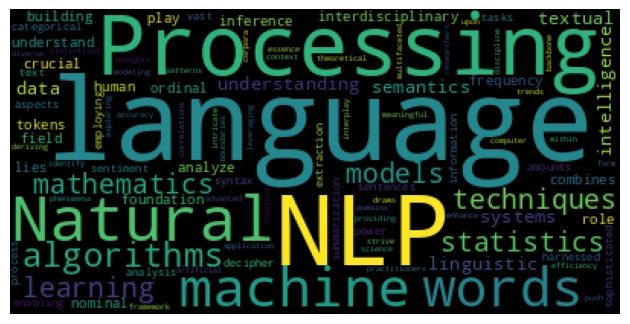

In [3]:
# @title Crea mapa de palabras
# Luego explicaremos con más detalle este código
stopword_en = nltk.corpus.stopwords.words('english')
#Creamos la lista de palabras
stopwords = set(stopword_en)
stopwords.update(["br", "href"])
text = """
Natural Language Processing (NLP) is an interdisciplinary field that combines statistics, mathematics,
and machine learning techniques to analyze and understand human language. In NLP, words, tokens,
and their frequency play a crucial role in building models for language inference.
The foundation of Natural Language Processing lies in understanding the nominal, ordinal,
and categorical aspects of language. By employing sophisticated algorithms, NLP systems can decipher
the semantics and syntax of words and sentences. In NLP, the power of machine learning models
is harnessed to process vast amounts of textual data, enabling tasks such as sentiment analysis,
text summarization, and information extraction. Through the application of advanced algorithms,
NLP practitioners strive to enhance the accuracy and efficiency of language processing systems.
Statistics and mathematics form the backbone of Natural Language Processing, providing the theoretical
framework for modeling linguistic phenomena and deriving meaningful insights from textual data.
By leveraging statistical techniques, NLP algorithms can identify patterns, trends, and correlations
within language corpora. In essence, Natural Language Processing is a multifaceted discipline
that draws upon diverse domains such as linguistics, computer science, and artificial intelligence.
By exploring the intricate interplay between words, semantics, and context, NLP researchers
continue to push the boundaries of language understanding and machine intelligence.
"""
wordcloud = WordCloud(stopwords=stopwords).generate(text)

plt.imshow(wordcloud,cmap='PiYG_r')
plt.axis("off")
plt.tight_layout()
# plt.savefig("mapa_palabras.png", bbox_inches='tight', pad_inches=0, dpi=600)
plt.show()

Más información sobre el PLN

## ¿Para qué nos sirve la estadística en el PLN?

<center>
 <img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/como_se_utiliza_la_Estadistica_en_pln.png?raw=1" alt="como se utiliza la estadistica en PLN" width="50%" height="50%">  
</center>


***
**¡Comencemos!**
***

# Contenido



1.   Estadística descriptiva univariante

    *   Tablas de frecuencias.
    *   Gráficos unidimensionales.
    *   Medidas de una variable cuantitativa:
        * de posición:
            * media aritmética
            * mediana y cuantiles
            * moda
        * de dispersión:
            * absoluta: recorrido, (cuasi)varianza y (cuasi)desviación típica
            * relativa: recorrido relativo, coeficiente de variación y valores tipificados
    * Análisis de frecuencias de n-gramas.

2.   Introducción a la Teoría de la Probabilidad
    *   Distribución de probabilidad
    *   Variable aleatoria
    *   Probabilidad condicionada. Teorema de bayes.
3.   Inferencia estadística
    *   Conceptos básicos.
    *   Casos de uso.

4.   Estadística multivariante
    *   Correlación.
    *   Regresión.
    *   Clasificación: lasificador bayesiano ingenuo.
5.  Modelización PLN
    * Modelos de lenguaje.
    * Modelos de etiquetado gramatical.
    * Modelos de aprendizaje autimático para el PLN.  

***
***

# Estadística descriptiva univariante

<center>
 <img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/desc-univariante.png?raw=1" alt="descriptiva" width="50%" height="50%">  
</center>

***
***

### ¿Sabemos qué es una variable o qué tipo de variables existen?

Una variable estadística es la expresión de una característica de una población. Lo habitual es disponer de los datos de esa variable en una muestra que sea parte de esa población.

Existen, a grandes rasgos, dos tipos de variables:

*   Variables numéricas
  *   Discretas (cardinalidad finita o numerable): es un tipo de variable cuantitativa que solo puede tomar valores aislados, generalmente enteros, que se obtienen mediante un conteo.
  
        Ejemplo: el número de letras de una palabra.

  *   Continuas (cardinalidad infinita): es un tipo de variable cuantitativa que puede tomar cualquier valor dentro de un intervalo, que se obtienen mediante una medición. Admite valores intermedios o decimales. Ejemplo: la longitud de una palabra.

*   Variables categóricas: es un tipo de variable que describen cualidades de los datos.
  *   Las variables ordinales: se pueden ordenar linealmente.
  
        Ejemplo: categorizar las palabras según su longitud en diferentes grupos ordenados, como:
        * Palabras cortas (1-3 caracteres)
        * Palabras de longitud media (4-6 caracteres)
        * Palabras largas (7 o más caracteres)

  *   Variables nominales: establecen categorías que no están intrínsecamente ordenadas.
  
        Ejemplo: categorías gramaticales, como sustantivos, verbos, adjetivos, adverbios, pronombres, preposiciones, conjunciones, entre otros.
  
  En sentido estricto, las cadenas de texto procedentes de un lenguaje son variables ordinales. Sin embargo, podríamos establecer el texto como un tipo de variable por sí misma, ya que tiene sus particularidades.






In [4]:
# @title Funciones prediseñadas necesarias durante el proceso
#Estas funciones se explican posteriormente

def group_by_sturges(df, column):
    num_bins = int(np.ceil(np.log2(len(df[column])) + 1))
    bin_width = (df[column].max() - df[column].min()) / num_bins
    bins, bin_edges = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True)

    # Generar etiquetas para los intervalos basados en los límites de los intervalos
    labels = [f"[{int(round(bin_edges[i],0))}-{int(round(bin_edges[i+1],0))})" for i in range(len(bin_edges)-1)]
    bins = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True, labels=labels)[0]
    return bins

def group_by_sqrt(df, column):
    num_bins = int(math.sqrt(df.shape[0]))
    bin_width = int((df[column].max() - df[column].min()) / num_bins)
    bins, bin_edges = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True)

    # Generar etiquetas para los intervalos basados en los límites de los intervalos
    labels = [f"[{int(round(bin_edges[i],0))}-{int(round(bin_edges[i+1],0))})" for i in range(len(bin_edges)-1)]
    bins = pd.cut(df[column], bins=num_bins, include_lowest=True, right=False, retbins=True, labels=labels)[0]
    return bins

def marca_de_clase(intervalo):
    limite_inferior, limite_superior = map(float, intervalo.strip("[]()").split('-'))
    return (limite_inferior + limite_superior) / 2


def calcular_mediana(datos):
    # Ordenar los datos
    datos_ordenados = sorted(datos)
    n = len(datos_ordenados)

    # Calcular la mediana
    if n % 2 == 1:
        # Si la cantidad de datos es impar
        mediana = datos_ordenados[n // 2]
        print("n es impar")
    else:
        # Si la cantidad de datos es par

        indice_medio1 = n // 2 - 1
        indice_medio2 = n // 2

        print(f"n es par, por lo tanto:\nla posición 1 es {datos_ordenados[indice_medio1]} y la posición 2 es {datos_ordenados[indice_medio2]}")
        mediana = (datos_ordenados[indice_medio1] + datos_ordenados[indice_medio2]) / 2
    return mediana


# Función para limpiar el texto
def limpiar_texto(texto):
    texto_limpio = texto.lower()  # Convertir a minúsculas
    texto_limpio = texto_limpio.replace('á', 'a').replace('é', 'e').replace('í', 'i').replace('ó', 'o').replace('ú', 'u').replace('ü', 'u')  # Quitar tildes
    texto_limpio = texto_limpio.replace(',', '')  # Quitar comas
    texto_limpio = texto_limpio.replace('.', '')  # Quitar puntos
    return texto_limpio

***
### Notación:
***

Establecemos la siguiente notación para lo que sigue.
* De una variable $X$ tenemos $N$ datos (casos) que pueden ser repetidos o no: $𝑋_1,𝑋_2,…,𝑋_𝑁$ (*en mayúsculas*).
* Si solo indicamos los valores distintos entre sí: $𝑥_1,𝑥_2,…,𝑥_𝐾$ (*en minúsculas*) cada uno con su respectiva frecuencia $𝑛_1,𝑛_2,…,𝑛_𝐾$.


**Notas:**
$𝑁=𝑛_1+𝑛_2+⋯+𝑛_𝐾=∑𝑛_𝑖$ representa el número de casos (el tamaño de la muestra).

$𝐾$ representa el número de valores distintos entre sí de la variable $𝑋$.

***

### Ejemplo de conjunto de datos:

Conjunto de datos de *Amazon Fine Food Reviews de Kaggle* (archivo disponible en [Reviews.csv](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)).

Cuenta con un total de ***568454*** reseñas de productos de ***Amazon***.

En este proyecto, para aligerar la intensidad computacional, utilizaremos una *muestra* obtenida de forma aleatoria, que contiene ***45476*** reseñas.

Recurriremos a este conjunto datos reducido para ilustrar muchos de los ejemplos que realizaremos durante el curso.

Las variables de este conjunto de datos son:

* ProductId - Identificador del producto.
* ProfileName - nombre del usuario.
* HelpfulnessNumerator - fracción de usuarios a los que les resultó útil la reseña.
* Score – clasificación del producto.
* Time -  hora de la reseña.
* Summary – Breve resumen de la reseña.
* Text – Reseña completa del artículo.



In [5]:
# @title Importar conjunto de datos
df = pd.read_csv('Reviews.csv')
#muestra: N
N=df.shape[0]
print(f"Información disponible en el dataframe:\n{list(df.columns)}\nEl dataframe contiene {N} reseñas\n")
display(df.loc[:,['Id', 'ProductId', 'ProfileName', 'Score', 'Time', 'Summary', 'Text']].head())

Información disponible en el dataframe:
['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']
El dataframe contiene 45476 reseñas



,Id,ProductId,ProfileName,Score,Time,Summary,Text
0,165257,B000EVG8J2,"B. Miller ""pet person""",5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...
1,231466,B0000BXJIS,Marty,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...
2,427828,B008FHUFAU,Kenneth Shevlin,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...
3,433955,B006BXV14E,rareoopdvds,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin..."
4,70261,B007I7Z3Z0,Og8ys1,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...


Para complementar la información proporcionada por el dataframe, se crean dos variables adicionales, una llamada *Longitud_Texto* que cuenta el número de palabras en cada reseña y otra, llamada *Num_Palabras_Unicas* que cuenta el número de palabras únicas (es decir sin que se repitan) en cada reseña.

In [6]:
# @title Crear dos variables nuevas
# Creamos una nueva variable que contiene el número de palabras que componene
# Contar la longitud de las palabras en la columna 'texto'
df['Longitud_Texto'] = df['Text'].apply(lambda x: len(x.split()))
# Calcula el número de palabras únicas en la columna 'Text'
df['Num_Palabras_Unicas'] = df['Text'].apply(lambda x: len(set(x.split())))

display(df.loc[:,['Id','Score', 'Summary', 'Text','Longitud_Texto','Num_Palabras_Unicas']].head())


,Id,Score,Summary,Text,Longitud_Texto,Num_Palabras_Unicas
0,165257,5,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,84,64
1,231466,5,great kitty treats,My cat loves these treats. If ever I can't fin...,99,75
2,427828,3,COFFEE TASTE,A little less than I expected. It tends to ha...,28,26
3,433955,2,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",294,191
4,70261,5,Great Taste . . .,and I want to congratulate the graphic artist ...,122,88


***
## TABLA DE FRECUENCIAS
***

También denominadas tabulaciones, resumen los datos de una variable.

Para cada valor observado $𝑥_{𝑖}$, en la tabla se indica:
* La frecuencia absoluta $𝑛_{𝑖}$ es el número de veces que se da el valor $𝑥_{𝑖}$.
* La frecuencia relativa $𝑓_{𝑖}=\frac{𝑛_{𝑖}}{𝑁}$ donde $𝑁$ es el número de casos. Notas:
    * $0 < f_{𝑖} \leq1$, representa la proporción de $𝑥_{𝑖}$;
    * se suele expresar en porcentaje: $𝑓_{𝑖}\times100$%.

Si la variable es cuantitativa o si es ordinal (esto es, sus valores se pueden ordenar), ordenamos los valores observados de manera creciente $𝑥_{1}<𝑥_{2}<⋯$ y también indicamos:
* La frecuencia absoluta acumulada $𝑁_{𝑖}=𝑛_{1}+𝑛_{2}+⋯+𝑛_{𝑖}$ es el número de casos menores o iguales que $𝑥_{𝑖}$.
* La frecuencia relativa acumulada $𝐹_{𝑖}=𝑓_{1}+𝑓_{2}+⋯+𝑓_{𝑖}$ . Notas:
    * $0 < F_{𝑖} \leq1$, representa la proporción de valores menores o iguales que $𝑥_{𝑖}$;
    * también se suele expresar en tanto por ciento: $𝐹_{𝑖}\times100$%.


In [7]:
# @title **Ejercicio:** Crear la tabla de frecuencias de la variable *longitud de palabras*:

#Creamos la tabla de frecuencias de la variable "longitud de palabras":

frecuencias_long = df['Longitud_Texto'].value_counts()
frecuencias_long = frecuencias_long.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas = frecuencias_long / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas = frecuencias_long.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum = frecuencias_acumuladas / len(df)

# Crear DataFrame con las frecuencias
tabla_frecuencias = pd.DataFrame({
    'x_i': frecuencias_long.index,
    'n_i': frecuencias_long.values,
    'f_i': frecuencias_relativas.values,
    'N_i':frecuencias_acumuladas.values,
    'F_i':frecuencias_relativas_acum.values
})
print("Tabla de frecuencias de la columna\n'Longitud del texto\n(número de palabras dentro de cada reseña)':\n")
display(tabla_frecuencias)

Tabla de frecuencias de la columna
'Longitud del texto
(número de palabras dentro de cada reseña)':



,x_i,n_i,f_i,N_i,F_i
0,6,1,0.000022,1,0.000022
1,7,5,0.000110,6,0.000132
2,9,1,0.000022,7,0.000154
3,10,3,0.000066,10,0.000220
4,11,7,0.000154,17,0.000374
...,...,...,...,...,...
593,1447,1,0.000022,45472,0.999912
594,1513,1,0.000022,45473,0.999934
595,1600,1,0.000022,45474,0.999956
596,1736,1,0.000022,45475,0.999978


### TABLA DE FRECUECIAS POR INTERVALOS

Si una variable cuenta con una gran cantidad de valores distintos, como es el caso de la variable *Longitud del texto*, a menudo se resumen en una tabla de frecuencias, reduciéndola por intervalos. En este caso la frecuencia, $𝑛_𝑖$, es el número de casos cuyos valores se encuentran en el 𝑖-ésimo intervalo.

***Intervalos***:
Cada intervalo está determinado por sus límites. Esto es, el intervalo $𝑎⟷𝑏$ representa los valores comprendidos entre $𝑎$ y $𝑏$.


Si se requiere determinar la ubicación de los límites, estos pueden ser referidos con una notación más completa. Generalmente se utilizan intervalos abiertos por la izquierda y cerrados por la derecha: $(𝑎,𝑏]$. Esto es, incluye los valores comprendidos entre $𝑎$ y $𝑏$, $𝑏$ incluido y $𝑎$ excluido.

La amplitud de intervalo $𝑎⟷𝑏$ es $𝑏−𝑎$, que también es la amplitud de los intervalos $(𝑎,𝑏]$ y $[𝑎,𝑏)$ (este último intervalo representa los valores mayores o iguales que $𝑎$ y menores que $𝑏$).

En las tablas de frecuencias los intervalos pueden ser de amplitud constante (más cómodo) o variable.

La densidad de frecuencia de un intervalo es la razón de su frecuencia absoluta sobre su amplitud. El intervalo $𝑖$ con frecuencia absoluta $𝑛_𝑖$ y amplitud $𝑎_𝑖$ tiene una densidad de frecuencia $ℎ_𝑖=𝑛_𝑖/𝑎_𝑖$.


En las variables cuantitativas la marca de clase de un intervalo es el valor concreto de la variable que representa cada intervalo, generalmente se toma el punto medio del intervalo. El punto medio de $(𝑎,𝑏]$ es: $(a+b)/2$. Para calcular medidas cuantitativas de una variable reducida por intervalos se usan las marcas de clase.

***Algunos métodos disponibles para calcular el número de intervalos:***

Llamaremos $k$ al número de intervalos y $N$ al número de datos.

Si $N > 100$ $k = [ 10, 20 ]$

* Regla de Sturges:

$$k = 1 + 3.322 \log_{10}(N)$$

* Regla de la raíz cuadrada: si $N < 100$ no convine que $k > \sqrt{N}$
$$k = \sqrt{N}$$







In [8]:
# @title **Ejemplo**: Resumimos los valores de la variable *Longitud del texto* por los intervalos indicados.

print("--------------------------------------------------------------------\nTras hacer el recuento obtenemos la siguiente tabla.\n--------------------------------------------------------------------\n")
# Calcular los grupos usando la función creada group_by_sturges
df['group_sturges'] = group_by_sturges(df, 'Longitud_Texto')

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo = df['group_sturges'].value_counts()
frecuencias_grupo = frecuencias_grupo.sort_index()
print("\nFrecuencias usando el método de sturges\n")

# Calcular la marca de clase para cada intervalo
MarcaDeClase = list(map(marca_de_clase, list(frecuencias_grupo.index)))

# Crear DataFrame con las frecuencias
tabla_frecuencias_Longitud_Texto = pd.DataFrame({
    'x_i': frecuencias_grupo.index,
    'n_i': frecuencias_grupo.values,
    'MarcaDeClase':MarcaDeClase})

print(tabla_frecuencias_Longitud_Texto)
# print(frecuencias_grupo.index)
# print(MarcaDeClase)


--------------------------------------------------------------------
Tras hacer el recuento obtenemos la siguiente tabla.
--------------------------------------------------------------------


Frecuencias usando el método de sturges

            x_i    n_i  MarcaDeClase
0       [6-117)  37157          61.5
1     [117-229)   6342         173.0
2     [229-340)   1298         284.5
3     [340-452)    394         396.0
4     [452-563)    167         507.5
5     [563-675)     42         619.0
6     [675-786)     23         730.5
7     [786-898)     33         842.0
8    [898-1009)      7         953.5
9   [1009-1121)      2        1065.0
10  [1121-1232)      2        1176.5
11  [1232-1344)      2        1288.0
12  [1344-1455)      3        1399.5
13  [1455-1567)      1        1511.0
14  [1567-1678)      1        1622.5
15  [1678-1790)      1        1734.0
16  [1790-1903)      1        1846.5


Podemos ver que hay varios intervalos con muy poca densidad de frecuencia, por lo que podemos unir los intervalos consecutivos en uno solo:

In [9]:
# @title Unir los grupos con poca frecuencia en uno solo:
# agrupar los últimos grupos en uno solo:

lista=[ '[898-1009)', '[1009-1121)', '[1121-1232)', '[1232-1344)',
                  '[1344-1455)', '[1455-1567)', '[1567-1678)', '[1678-1790)',
                  '[1790-1903)']

# Reemplazar los valores en la columna 'columna_original' con ">1472.571" si coinciden con los valores de la lista
df['group_sturges'] = df['group_sturges'].replace(lista, '[897.76-1902.9]')

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo = df['group_sturges'].value_counts()
frecuencias_grupo = frecuencias_grupo.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas_gr = frecuencias_grupo / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas_gr = frecuencias_grupo.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum_gr = frecuencias_acumuladas_gr / len(df)

# Crear DataFrame con las frecuencias
tabla_frecuencias_gr = pd.DataFrame({
    'x_i': frecuencias_grupo.index,
    'n_i': frecuencias_grupo.values,
    'f_i': frecuencias_relativas_gr.values,
    'N_i':frecuencias_acumuladas_gr.values,
    'F_i':frecuencias_relativas_acum_gr.values
})


print("Tabla de frecuencias agrupadas por intervalo de la columna\n'Longitud del texto':\n")
display(tabla_frecuencias_gr)


Tabla de frecuencias agrupadas por intervalo de la columna
'Longitud del texto':



,x_i,n_i,f_i,N_i,F_i
0,[6-117),37157,0.817068,37157,0.817068
1,[117-229),6342,0.139458,43499,0.956527
2,[229-340),1298,0.028543,44797,0.985069
3,[340-452),394,0.008664,45191,0.993733
4,[452-563),167,0.003672,45358,0.997405
5,[563-675),42,0.000924,45400,0.998329
6,[675-786),23,0.000506,45423,0.998835
7,[786-898),33,0.000726,45456,0.999560
8,[897.76-1902.9],20,0.000440,45476,1.000000


In [10]:
# @title TabFreq_conteo_unico { display-mode: "form" }
#Creamos la tabla de frecuencias de la variable "Num_Palabras_Unicas":

frecuencias_long_unic = df['Num_Palabras_Unicas'].value_counts()
frecuencias_long_unic = frecuencias_long_unic.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas_unic = frecuencias_long_unic / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas_unic = frecuencias_long_unic.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum_unic = frecuencias_relativas_unic / len(df)

# Crear DataFrame con las frecuencias
tabla_frecuencias_unic = pd.DataFrame({
    'x_i': frecuencias_long_unic.index,
    'n_i': frecuencias_long_unic.values,
    'f_i': frecuencias_relativas_unic.values,
    'N_i':frecuencias_acumuladas_unic.values,
    'F_i':frecuencias_relativas_acum_unic.values
})



# Calcular los grupos usando la función creada group_by_sturges
df['group_sturges_unic'] = group_by_sturges(df, 'Num_Palabras_Unicas')

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo_unic = df['group_sturges_unic'].value_counts()
frecuencias_grupo_unic = frecuencias_grupo_unic.sort_index()
print("\nFrecuencias usando el método de sturges en conteo único\n")

# Calcular la marca de clase para cada intervalo
MarcaDeClase_unic = list(map(marca_de_clase, list(frecuencias_grupo_unic.index)))

# Crear DataFrame con las frecuencias
tabla_frecuencias_Num_Palabras_Unicas = pd.DataFrame({
    'x_i': frecuencias_grupo_unic.index,
    'n_i': frecuencias_grupo_unic.values,
    'MarcaDeClase':MarcaDeClase_unic})

print(tabla_frecuencias_Num_Palabras_Unicas)





Frecuencias usando el método de sturges en conteo único

          x_i    n_i  MarcaDeClase
0      [6-55)  27209          30.5
1    [55-105)  12774          80.0
2   [105-154)   3696         129.5
3   [154-203)   1081         178.5
4   [203-253)    387         228.0
5   [253-302)    161         277.5
6   [302-351)     87         326.5
7   [351-401)     24         376.0
8   [401-450)     36         425.5
9   [450-500)      7         475.0
10  [500-549)      3         524.5
11  [549-598)      1         573.5
12  [598-648)      3         623.0
13  [648-697)      4         672.5
14  [697-746)      1         721.5
15  [746-796)      1         771.0
16  [796-846)      1         821.0


In [11]:
# @title **Ejercicio:** Resumimos los valores de la variable *Score*, realizando los conteos necesarios

print("--------------------------------------------------------------------------------\nTras hacer el recuento obtenemos la siguiente tabla.\n--------------------------------------------------------------------------------")
# Calcular la tabla de frecuencias de la columna 'Score'
frecuencias_score = df['Score'].value_counts()
frecuencias_score = frecuencias_score.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas = frecuencias_score / len(df)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas = frecuencias_score.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum = frecuencias_acumuladas / len(df)


# Crear DataFrame con las frecuencias
tabla_frecuencias = pd.DataFrame({
    'x_i': frecuencias_score.index,
    'n_i': frecuencias_score.values,
    'f_i': frecuencias_relativas.values,
    "N_i":frecuencias_acumuladas.values,
    "F_i":frecuencias_relativas_acum.values
})
display(tabla_frecuencias)

--------------------------------------------------------------------------------
Tras hacer el recuento obtenemos la siguiente tabla.
--------------------------------------------------------------------------------


,x_i,n_i,f_i,N_i,F_i
0,1,4144,0.091125,4144,0.091125
1,2,2347,0.051610,6491,0.142735
2,3,3439,0.075622,9930,0.218357
3,4,6411,0.140975,16341,0.359332
4,5,29135,0.640668,45476,1.000000


Observa la tabla de frecuencias del puntaje (score) de las reseñas de Amazon y contesta a las siguientes preguntas:


1.   ¿Cuántas reseñas fueron valoradas con 4?
2.   ¿Cuántas reseñas fueron valoradas con menos de 3?
3.   ¿Cuántas reseñas tienen 4 o menos de valoración?
4.   ¿Cuántas reseñas tienen más de 4 puntos de valoración?
5.   ¿Cuál es la proporción de reseñas con puntaje igual a 3?
6.   ¿Cuál es la proporción de reseñas menores a 3?
7.   ¿Cuál es la proporción de reseñas mayores de 2?



***


In [12]:
# @title Respuesta:
print(f"1. ¿Cuántas reseñas fueron valoradas con 4?: {tabla_frecuencias[tabla_frecuencias['x_i']==4]['n_i'].values[0]}")
print(f"2. ¿Cuántas reseñas fueron valoradas con menos de 3?: {tabla_frecuencias[tabla_frecuencias['x_i']<3]['n_i'].values.sum()}")
print(f"3. ¿Cuántas reseñas tienen 4 o menos de valoración?: {tabla_frecuencias[tabla_frecuencias['x_i']<5]['n_i'].values.sum()}")
print(f"4. ¿Cuántas reseñas tienen más de 4 puntos de valoración?: {tabla_frecuencias[tabla_frecuencias['x_i']>4]['n_i'].values.sum()}")
print(f"5. ¿Cuál es la proporción de reseñas con puntaje igual a 3?: {round(tabla_frecuencias[tabla_frecuencias['x_i']==3]['f_i'].values.sum(),4)} ó {round(tabla_frecuencias[tabla_frecuencias['x_i']==3]['f_i'].values.sum()*100,4)}%")
print(f"6. ¿Cuál es la proporción de reseñas menores a 3?: {round(tabla_frecuencias[tabla_frecuencias['x_i']==2]['F_i'].values[0],4)} ó {round(tabla_frecuencias[tabla_frecuencias['x_i']==2]['F_i'].values[0]*100,4)}%")
print(f"7. ¿Cuál es la proporción de reseñas mayores de 2?: {round(tabla_frecuencias[tabla_frecuencias['x_i']>2]['f_i'].values.sum(),3)} ó {round(tabla_frecuencias[tabla_frecuencias['x_i']>2]['f_i'].values.sum()*100,3)}%")

1. ¿Cuántas reseñas fueron valoradas con 4?: 6411
2. ¿Cuántas reseñas fueron valoradas con menos de 3?: 6491
3. ¿Cuántas reseñas tienen 4 o menos de valoración?: 16341
4. ¿Cuántas reseñas tienen más de 4 puntos de valoración?: 29135
5. ¿Cuál es la proporción de reseñas con puntaje igual a 3?: 0.0756 ó 7.5622%
6. ¿Cuál es la proporción de reseñas menores a 3?: 0.1427 ó 14.2735%
7. ¿Cuál es la proporción de reseñas mayores de 2?: 0.857 ó 85.727%


***
***

### ALGUNOS TIPOS DE GRÁFICOS

Para variables **discretas** (toman pocos valores distintos):

* Gráficos de sectores: cada valor ocupa un sector circular cuya proporción de área (con respecto al círculo que representa el total) es la frecuencia relativa.  
* Gráficos de barras. De dos tipos:
  * de valores: una barra por cada caso ($𝑁$ barras), de manera que la altura de barra 𝑖-ésima expresa el valor 𝑋_𝑖;
  * de frecuencias: una barra por cada valor distinto $𝑥_𝑖$, de manera que la altura de la barra $𝑥_𝑖$ expresa su frecuencia absoluta $𝑛_𝑖$.

Para variables **continuas** (toman un amplio rango de posibles valores):
* histogramas.
Son gráficos de rectángulos pegados cuyas bases representan los intervalos determinados y cuyas alturas representan sus densidades ($ℎ_𝑖/𝑁$).

    Se puede considerar que son gráficos de barras de frecuencias especiales.

Gráficos para PLN:
   * Nube de palabras (Word Clouds) (Que vimos al principio).
   * Gráfico de análisis sintáctico

    


Text(0.5, 1.0, 'Gráfico de frecuencia del Score')

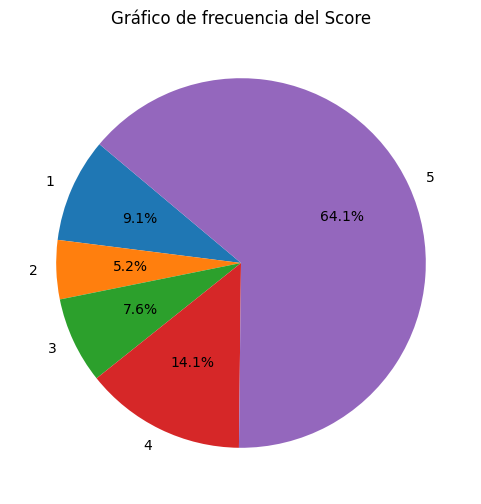

In [13]:
# @title Gráfico de sectores:
sizes = tabla_frecuencias.n_i
labels = tabla_frecuencias.x_i

plt.figure(figsize=(6, 6))  # Tamaño del gráfico (opcional)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Agregar un título
plt.title('Gráfico de frecuencia del Score')
# plt.savefig("Pie_chart_score.png", bbox_inches='tight', pad_inches=0, dpi=600)

Frecuencias por tipo de sentimiento:
Malo (1-2)      6491
Neutral (3)     3439
Bueno (4-5)    35546
Name: sentiment, dtype: int64


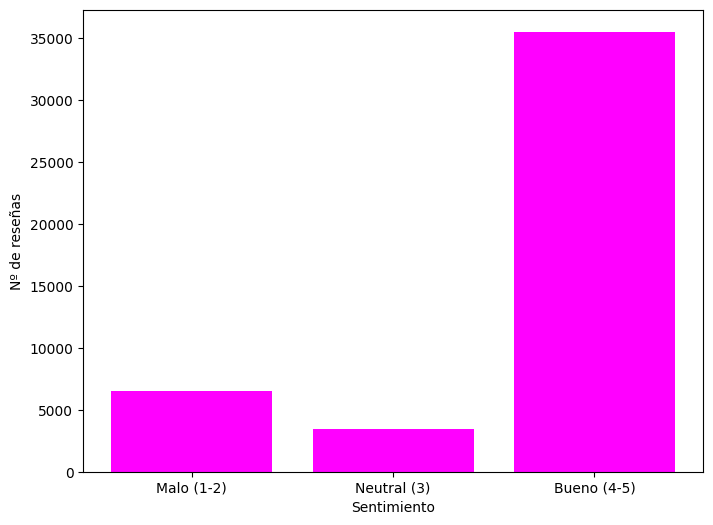

In [14]:
# @title **Gráfico de barras**: Para visualizar un ejemplo, creamos una nueva variable ***Sentiment*** que divide en tres grupos las reseñas. Las reseñas con Score de 1, 2 son catalogadas como *Malo*, Score de 3 como *Neutral* y Score de 4 o 5 son catalogadas como *Buenas*.

#Primero clasificaremos las reseñas en doos grupos (buenas o malas)
# assign reviews with score > 3 as positive sentiment
# score < 3 negative sentiment
# score = 3 Neutral
df['sentiment'] = pd.cut(df['Score'], bins=[1,3,4,6], labels=['Malo (1-2)', 'Neutral (3)', 'Bueno (4-5)'], right=False)

frecuencias_sentiment = df['sentiment'].value_counts()
frecuencias_sentiment = frecuencias_sentiment.sort_index()

print(f"Frecuencias por tipo de sentimiento:\n{frecuencias_sentiment}")

# Datos de ejemplo
labels = frecuencias_sentiment.index
sizes = frecuencias_sentiment.values

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))  # Tamaño del gráfico (opcional)
plt.bar(labels, sizes, color='magenta')

# Agregar etiquetas y título
plt.ylabel('Nº de reseñas')
plt.xlabel('Sentimiento')
# plt.title('Gráfico de sentimeinto')
# plt.savefig("bar_chart_score_agrupado.png", bbox_inches='tight', pad_inches=0, dpi=600)

# Mostrar el gráfico
plt.show()

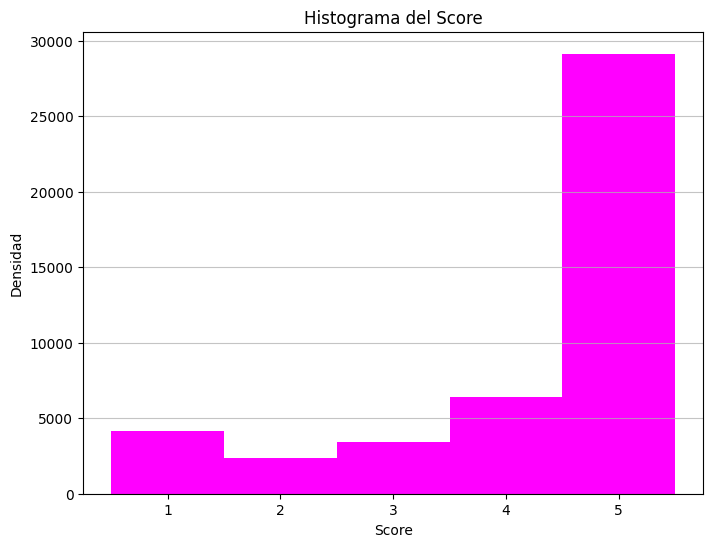

Frecuencia del bin 1.0 - 2.0: 4144.0
Frecuencia del bin 2.0 - 3.0: 2347.0
Frecuencia del bin 3.0 - 4.0: 3439.0
Frecuencia del bin 4.0 - 5.0: 6411.0
Frecuencia del bin 5.0 - 6.0: 29135.0


In [15]:
# @title **Histograma:** Histograma del puntaje de las reseñas (Score):

data=list(df['Score'].values)
# Crear el histograma con las barras juntas y densidad
plt.figure(figsize=(8, 6))  # Tamaño del gráfico (opcional)
values, bins, _ = plt.hist(data, bins=range(min(data), max(data) + 2), align='left', rwidth=1, color='magenta', density=False)

# Agregar etiquetas y título
plt.xlabel('Score')
plt.ylabel('Densidad')
plt.title('Histograma del Score')

# Mostrar el histograma
plt.grid(axis='y', alpha=0.75)
plt.show()

#para mostrar las frecuencias reltativas en vez de las aboslutas usar: values, bins, _ = plt.hist(data, bins=range(min(data), max(data) + 2), align='left', rwidth=1, color='magenta', density=False)

for i in range(len(values)):
    print(f"Frecuencia del bin {bins[i]} - {bins[i+1]}: {values[i]}")

------------------------------------------------------------
 Histograma
------------------------------------------------------------



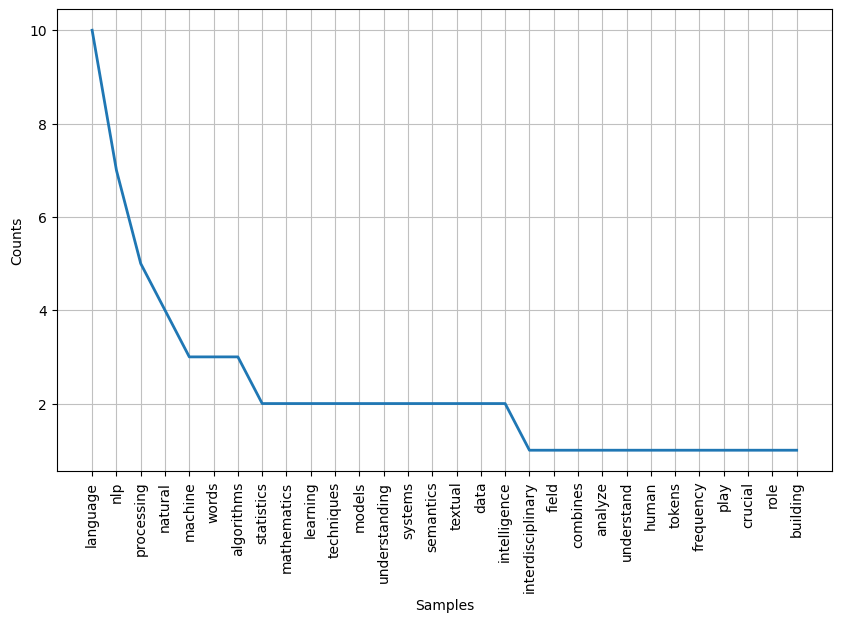

------------------------------------------------------------
 Nube de palabras
------------------------------------------------------------



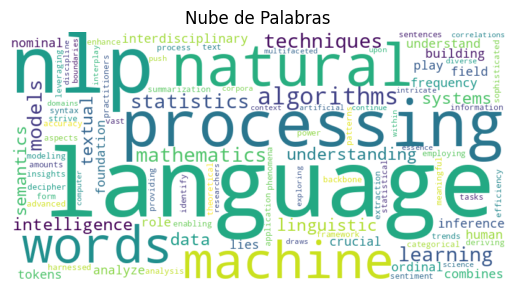

------------------------------------------------------------
 Árbol Sintántico
------------------------------------------------------------



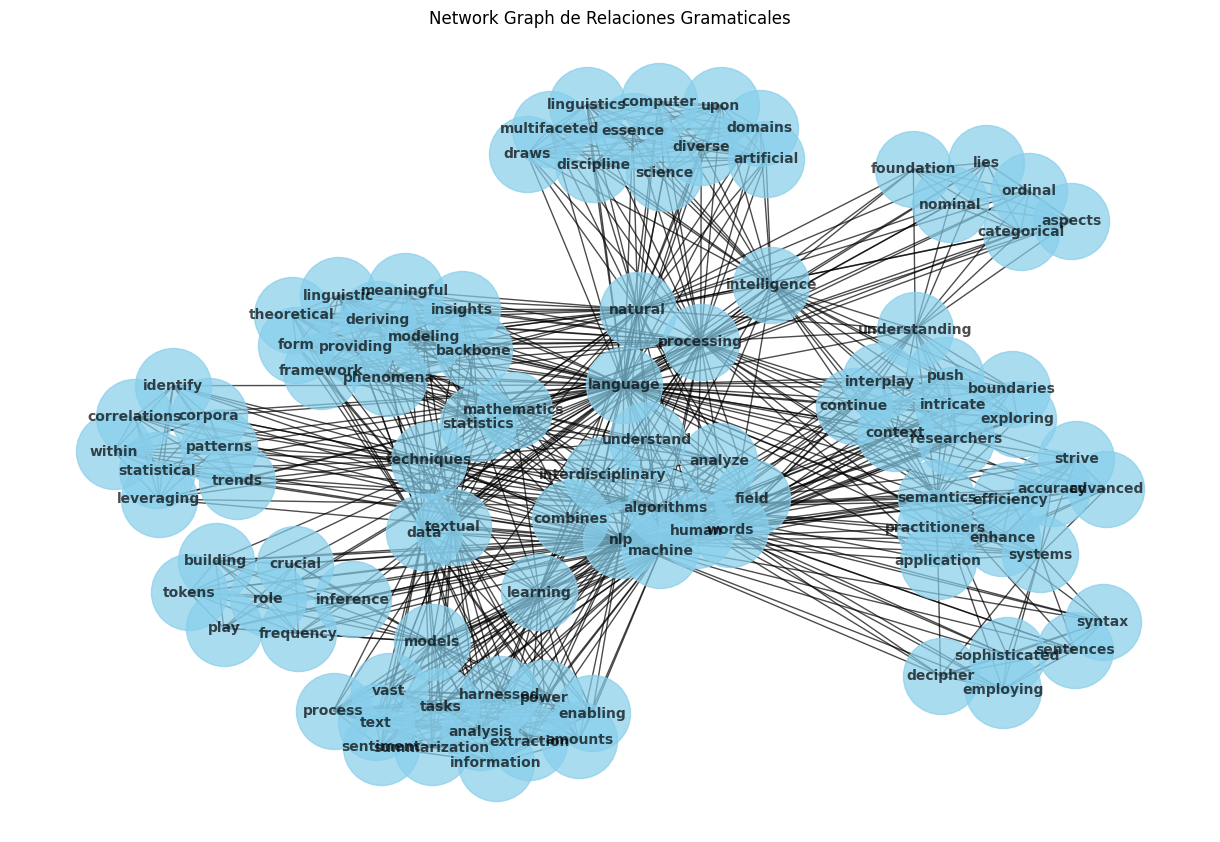

In [35]:
# @title **PLN:** - Histogramas - Nube de palabras - Árbol sintántico
# Tokenizar el texto

tokens = word_tokenize(text)

# Eliminar palabras vacías (stopwords)
stop_words = set(stopwords.words('english'))
tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words]

# Calcular la distribución de frecuencias
freq_dist = FreqDist(tokens)

print("------------------------------------------------------------\n Histograma\n------------------------------------------------------------\n")

# Histograma de las palabras más comunes
plt.figure(figsize=(10, 6))
freq_dist.plot(30, cumulative=False)
plt.title('Histograma de Palabras Más Comunes')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
# plt.show()

print("------------------------------------------------------------\n Nube de palabras\n------------------------------------------------------------\n")

# Nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
# plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

# Tokenizar el texto en oraciones
sentences = sent_tokenize(text)

# Tokenizar cada oración en palabras y eliminar palabras vacías
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
filtered_sentences = [[word.lower() for word in words if word.isalnum() and word.lower() not in stopword_en] for words in tokenized_sentences]

# Etiquetar las palabras con partes del discurso
tagged_sentences = [nltk.pos_tag(words) for words in filtered_sentences]

# # Crear árbol sintáctico para cada oración
# for tagged_sentence in tagged_sentences:
#     tree = nltk.ne_chunk(tagged_sentence)
#     print(tree)

# Crear grafo NetworkX
G = nx.Graph()

# Agregar nodos al grafo
for tagged_sentence in tagged_sentences:
    for word, pos_tag in tagged_sentence:
        G.add_node(word, pos=pos_tag)

# Agregar bordes basados en la co-ocurrencia de palabras en la misma oración
for tagged_sentence in tagged_sentences:
    for i in range(len(tagged_sentence)):
        for j in range(i+1, len(tagged_sentence)):
            word1, pos_tag1 = tagged_sentence[i]
            word2, pos_tag2 = tagged_sentence[j]
            if word1 != word2:
                G.add_edge(word1, word2)

print("------------------------------------------------------------\n Árbol Sintántico\n------------------------------------------------------------\n")
# Visualizar el grafo NetworkX
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='black', linewidths=1, alpha=0.7)
plt.title('Network Graph de Relaciones Gramaticales')
plt.show()



***
## Medidas de posición: media, mediana, cuantiles y moda.
***


Para hacer manejable la masa de datos procedentes de la observación estadística, es necesario resumir el volumen de los datos. Ya hemos visto cómo reducir y organizar la masa de datos con las tablas de frecuencias.

En el caso de las **variables cuantitativas**, es posible reducir aún más esta información, valiéndonos de unos pocos valores que las describan y caractericen. Estos valores, que llamamos estadísticos, nos indican las características más importantes de las distribuciones de frecuencias y se suelen clasificar en los siguientes grupos:

* de posición:
    * media aritmética
    * mediana
    * cuantiles
    * moda
* de dispersión:
    * (cuasi)varianza
    * (cuasi)desviación típica
    * coeficiente de variación
* de concentración: índice de Gini.

### Medidas de posición:

Las **medidas de posición** resumen la distribución de los valores de una variable.

Para que un valor pueda ser considerado una medida de posición tiene que tomar un valor **comprendido entre el mínimo y el máximo de la variable.**

Existen dos tipos de medidas de posición: las **centrales** y las **no centrales**.

De las medidas de posición central, las más utilizadas son: la **media aritmética**, la **mediana** y la **moda**.

Los **cuantiles** son las medidas de posición no central.


***
### Media Aritmética
***

La media aritmética es la suma de todos los valores observados de la distribución, dividida por el número total de casos.
$$\bar{X}=\frac{1}{N} \sum_{(𝑖=1)}^{𝑁}𝑋_{𝑖} =\frac{(𝑋_1+𝑋_2+…+𝑋_𝑁)}{N}.$$

Si tenemos $𝐾$ valores distintos que se repiten, y conocemos sus frecuencias, podemos calcular la media como:
$$\bar{X}=\frac{1}{N} \sum_{(𝑖=1)}^{𝑁}n_{𝑖}𝑥_{𝑖} =\frac{(𝑛_1 𝑥_1+𝑛_2 𝑥_2+…+𝑛_𝑘 𝑥_𝐾)}{N}.$$

In [ ]:
# @title Genera suma de X_i y valor de N para la variable *Longitud_texto*
print(f"La suma de X_i para el ejercicio es {df['Longitud_Texto'].sum()}" )
print(f"El tamaño (N) de X_i para el ejercicio es {N}")

La suma de X_i para el ejercicio es 3638051
El tamaño (N) de X_i para el ejercicio es 45476


### Ejercicios:

Calcular la media aritmética en las siguientes situaciones.

1. Para la variable $X=(4, 7, 5, 7, 5, 4, 2, 7)$.

2. Para la variable **Longitud_Texto**:

    Sabiendo que $\sum 𝑋_{𝑖}=3638051$   y $N= 45476$

3. Usando la reducción por intervalos de la tabla de frecuencias de la variable **Longitud_Texto** (Cálculo de la marca de clase)


### Media aritmética de datos agrupados:

In [ ]:
# @title Rta1 y 2 { display-mode: "code" }
X = [4, 7, 5, 7, 5, 4, 2, 7]
x_hat = round(sum(X) / len(X),2)
# Imprimir el texto junto con la variable y su valor
print(f"1. Para la variable X = {X}: \u0302x={x_hat}")

# Para la variable Longitud_Texto:
x_hat = round(df["Longitud_Texto"].mean(),2)
suma = df["Longitud_Texto"].sum()
n = N
print(f"2. Para la variable Longitud_Texto: \u0302x={suma}/{n}={x_hat}")

1. Para la variable X = [4, 7, 5, 7, 5, 4, 2, 7]: ̂x=5.12
2. Para la variable Longitud_Texto: ̂x=3638051/45476=80.0


In [ ]:
# @title Crea marca de clase:
# Mostrar la tabla de frecuencias con la marca de clase
print(tabla_frecuencias_Longitud_Texto[['x_i','MarcaDeClase','n_i']])

            x_i  MarcaDeClase    n_i
0       [6-117)          61.5  37157
1     [117-229)         173.0   6342
2     [229-340)         284.5   1298
3     [340-452)         396.0    394
4     [452-563)         507.5    167
5     [563-675)         619.0     42
6     [675-786)         730.5     23
7     [786-898)         842.0     33
8    [898-1009)         953.5      7
9   [1009-1121)        1065.0      2
10  [1121-1232)        1176.5      2
11  [1232-1344)        1288.0      2
12  [1344-1455)        1399.5      3
13  [1455-1567)        1511.0      1
14  [1567-1678)        1622.5      1
15  [1678-1790)        1734.0      1
16  [1790-1903)        1846.5      1


In [ ]:
# @title Rta 3.
marcas_de_clase =  tabla_frecuencias_Longitud_Texto['MarcaDeClase']
frecuencias     =  tabla_frecuencias_Longitud_Texto['n_i']
# Calculando la suma de los productos de las marcas de clase y las frecuencias
suma_productos = sum(marcas_de_clase[i] * frecuencias[i] for i in range(len(marcas_de_clase)))

# # Calculando el total de observaciones
total_observaciones = sum(frecuencias)

# # Calculando la media aritmética
x_hat = suma_productos / total_observaciones

print(f"3. Para la variable Longitud_Texto en datos agrupados:\n\u0302x={round(x_hat,2)}")

3. Para la variable Longitud_Texto en datos agrupados:
̂x=89.89


### Media aritmética: pros



Tiene en cuenta **todos los valores observados**.

Es **fácil de calcular.**

Tiene un **claro significado estadístico:** representa el valor que tomaría cada una de las observaciones si el total se repartiera de manera equitativa.

Es **única**.

### Media aritmética: contras

Los valores extremos ejercen gran influencia sobre el valor de la media aritmética (un valor extremo es un dato excepcionalmente pequeño o grande en comparación con el resto)




In [ ]:
Datos1 = [2,5,7,9,12]
Datos2 = [2,5,7,9,125]
Datos = pd.DataFrame({
    'Datos1': Datos1,
    'Datos2': Datos2
})
display(Datos)

,Datos1,Datos2
0,2,2
1,5,5
2,7,7
3,9,9
4,12,125


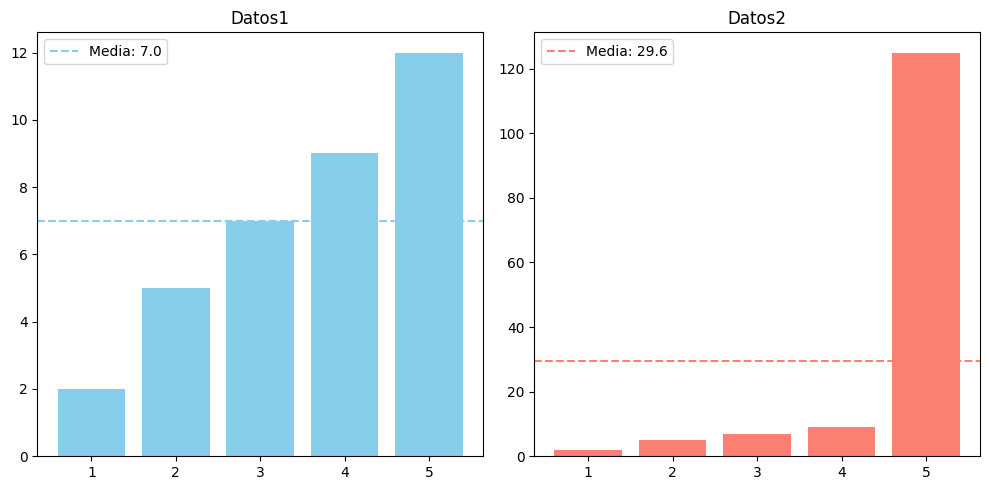

La media de los Datos 1 es 7.0

La media de los Datos 2 es 29.6


In [ ]:
# @title Calcula la media de los dos conjuntos de datos:
# Calcular las medias de Datos1 y Datos2
media_datos1 = sum(Datos1) / len(Datos1)
media_datos2 = sum(Datos2) / len(Datos2)

# Crear la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico de barras para Datos1
axs[0].bar(range(len(Datos1)), Datos1, color='skyblue')
axs[0].axhline(y=media_datos1, color='skyblue', linestyle='--', label=f'Media: {media_datos1}')
axs[0].set_title('Datos1')
axs[0].set_xticks(range(len(Datos1)))
axs[0].set_xticklabels(range(1, len(Datos1) + 1))
axs[0].legend()

# Gráfico de barras para Datos2
axs[1].bar(range(len(Datos2)), Datos2, color='salmon')
axs[1].axhline(y=media_datos2, color='salmon', linestyle='--', label=f'Media: {media_datos2}')
axs[1].set_title('Datos2')
axs[1].set_xticks(range(len(Datos2)))
axs[1].set_xticklabels(range(1, len(Datos2) + 1))
axs[1].legend()

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()
print(f'La media de los Datos 1 es {media_datos1}\n\nLa media de los Datos 2 es {media_datos2}')

### Media aritmética: propiedades


* La suma de las desviaciones de los valores de la variable, respecto a su media aritmética, es igual a cero:
$$\sum(X_{i}−\bar{X})= 0 $$.

* Si transformamos los valores de la variable  a través de un cambio de origen y escala $(U=a+bX)$, la media aritmética de la variable transformada es $\bar{U}= a+b\bar{X}$.

* En particular (para $b=1$) si $U=a+X$ entonces $\bar{U}= a+\bar{X}$.

    * Ejemplo. Supongamos que tenemos el peso de $N = 20$ personas $X = (59, 41, 55, 79, 61, 83, 43, 54, 89, 57, 80, 86, 67, 56, 80, 42, 60, 83, 76, 87)$.

    * Ahora, supongamos que hacemos la tranformación $\bar{U}= a+\bar{X}$ dónde $a=10$ y $b=1$, entonces $U = (69, 51, 65, 89, 71, 93, 53, 64, 99, 67, 90, 96, 77, 66, 90, 52, 70, 93, 86, 9)$

    * Entonces $\bar{U}= a+\bar{X} = 10 + \frac{\sum_{i}{X}}{20} ≡ \frac{\sum_{i}U}{20}$
  



In [ ]:
# @title Genera listas X y U y calcula las medias:
# Generar la lista X
# X = [random.randint(40, 90) for _ in range(20)]
X = [59, 41, 55, 79, 61, 83, 43, 54, 89, 57, 80, 86, 67, 56, 80, 42, 60, 83, 76, 87]

print(f"Lista X: {X}\ny la suma de X: {sum(X)}")
a = 10
b = 1

# Generar la lista U.
U = [b*x + a for x in X]
print(f"Lista U: {U}\ny la suma de U: {sum(U)}")

x_bar= sum([i for i in X]) / len([i for i in X])
print("utilizando la conversión:\n")
print(f"La media de U = {b} X {x_bar} + {a}= {round(b*x_bar+a,1)}")
print("Calculando  la  media de U directamente:\n")
print(f"La media de U =  {sum([i for i in U]) / len([i for i in U])}")

Lista X: [59, 41, 55, 79, 61, 83, 43, 54, 89, 57, 80, 86, 67, 56, 80, 42, 60, 83, 76, 87]
y la suma de X: 1338
Lista U: [69, 51, 65, 89, 71, 93, 53, 64, 99, 67, 90, 96, 77, 66, 90, 52, 70, 93, 86, 97]
y la suma de U: 1538
utilizando la conversión:

La media de U = 1 X 66.9 + 10= 76.9
Calculando  la  media de U directamente:

La media de U =  76.9



Si dividimos todas las observaciones en $k$ grupos disjuntos, cada uno de ellos con media $\bar{x}_{i}$ y tamaño $𝑁_{𝑖}$, la media aritmética de todo el conjunto se puede calcular como
$$\bar{X}=\frac{(\bar{X}_{1}N_{1}+…+\bar{X}_{k}N_{k})}{N}$$

***
## Mediana
***

Dada una variable $X$, su mediana, $Me(X)$, es el valor tal que es mayor que la mitad (al menos) de los casos y también es menor o igual que (al menos) la mitad de los casos.

Para calcular la mediana buscamos el valor central en la lista de valores ordenados de $X$. Para ello, ordenamos los casos de manera que $X_{1} < X_{2} < ... < X_{N} $. Calculamos la posición central $\frac{(N+1)}{2}$:

* Si el resultado es entero (esto es, si $N$ es impar), entonces $Me(X)=X_{(N+1)/2}$.

* En otro caso (si $N$ es par): $Me(X)=\frac{(X_{(N)/2}+X_{(N+2)/2})}{2}$, esto es, el promedio de los valores en las posiciones inmediatamente anterior y posterior a $\frac{(N+1)}{2}$.

¿$X$ está reducida por intervalos? $\rightarrow$ Lo veremos más adelante.


In [ ]:
# @title Calcula la mediana:
# Ejemplo de datos
datos = df['Longitud_Texto']

# Calcular la mediana
mediana = calcular_mediana(datos)

# Imprimir la mediana
print("La mediana de la longitud de palabras de las reseñas es:", mediana)


n es par, por lo tanto:
la posición 1 es 56 y la posición 2 es 56
La mediana de la longitud de palabras de las reseñas es: 56.0


Otra forma de hacerlo (función prediseñada):

In [ ]:
# @title Cálculo de la mediana con función de Python:
#Se requiere el uso de la función median de la librería statistics:
# Calcular la mediana
mediana2 = median(datos)

# Imprimir la mediana
print("La mediana de los datos es:", mediana2)

La mediana de los datos es: 56.0


### Mediana por intervalos:

Si la variable $X$ está reducida por intervalos, tomaremos como $Me(X)$ la marca de clase del **intervalo mediano**.

El intervalo mediano es el primer intervalo cuya frecuencia absoluta acumulada sea mayor o igual a $(N+1)/2$. De manera equivalente, también podemos obtenerlo buscando el primer intervalo tal que su frecuencia absoluta relativa sea mayor o igual a $\frac{1}{2}=0.5$. Esto es, el intervalo mediano es el intervalo $i$ tal que:
$$N_{i} \geq \frac{N+1}{2}$$ y $$N_{i-1} < \frac{N+1}{2}$$

O de manera equivalente, $F_{i} \geq 0.5$ y $F_{i-1} < 0.5$.


Cómo ejemplo, utilizaremos un nuevo texto que contiene 218 palabras:

**Este texto que estás leyendo ahora mismo sirve como un ejemplo ilustrativo para calcular el número mediano de la longitud de palabras dentro de un texto determinado. Es un ejercicio práctico que nos permite comprender cómo funcionan los cálculos de estadísticas descriptivas aplicadas al análisis lingüístico.
En este contexto, la longitud de las palabras se refiere al número de caracteres que componen cada palabra individualmente. Al analizar este texto, encontrarás palabras cortas, como "este", "es", "un", "de", así como palabras más largas como "ilustrativo", "estadísticas", "descriptivas", entre otras.
El objetivo es determinar el número mediano de caracteres que conforman las palabras en este texto. Al calcular este valor, podemos tener una idea más clara de la extensión promedio de las palabras utilizadas aquí. Este proceso implica ordenar las longitudes de las palabras de menor a mayor y encontrar el valor medio.
Este ejercicio es útil en diversos contextos, desde análisis de texto en lingüística computacional hasta la elaboración de informes y análisis de contenido en campos como la investigación académica, la publicidad y el procesamiento del lenguaje natural.
Es importante destacar que el cálculo del número mediano de longitud de palabras nos brinda información valiosa sobre la estructura y complejidad del lenguaje utilizado, lo que puede tener implicaciones significativas en la comunicación efectiva y la comprensión del texto.**

Al que calcularemos la mediana de la longitud de las palabras dentro del texto, teniendo la tabla de frecuencias agrupadas por ***intervalos***:


In [ ]:
# @title Ejercicio: Cálculo de mediana en datos agrupados por intervalos:

texto = """
Este texto que estás leyendo ahora mismo sirve como un ejemplo ilustrativo para calcular el número mediano de la longitud de palabras dentro de un texto determinado. Es un ejercicio práctico que nos permite comprender cómo funcionan los cálculos de estadísticas descriptivas aplicadas al análisis lingüístico.

En este contexto, la longitud de las palabras se refiere al número de caracteres que componen cada palabra individualmente. Al analizar este texto, encontrarás palabras cortas, como "este", "es", "un", "de", así como palabras más largas como "ilustrativo", "estadísticas", "descriptivas", entre otras.

El objetivo es determinar el número mediano de caracteres que conforman las palabras en este texto. Al calcular este valor, podemos tener una idea más clara de la extensión promedio de las palabras utilizadas aquí. Este proceso implica ordenar las longitudes de las palabras de menor a mayor y encontrar el valor medio.

Este ejercicio es útil en diversos contextos, desde análisis de texto en lingüística computacional hasta la elaboración de informes y análisis de contenido en campos como la investigación académica, la publicidad y el procesamiento del lenguaje natural.

Es importante destacar que el cálculo del número mediano de longitud de palabras nos brinda información valiosa sobre la estructura y complejidad del lenguaje utilizado, lo que puede tener implicaciones significativas en la comunicación efectiva y la comprensión del texto.
"""

# Limpiar el texto original
texto_limpio = limpiar_texto(texto)

print("---------")
print(f"\nTexto:\n{texto_limpio}\n")
palabras = texto_limpio.split()

longitudes = [len(palabra) for palabra in palabras]

pal_long= pd.DataFrame({
    'palabras': palabras,
    'longitudes': longitudes})
pal_long['longitudes_group'] = group_by_sturges(pal_long, 'longitudes')

N_ej3=pal_long.shape[0]
print(f"Tamaño del conjunto de datos: {N_ej3} palabras")
display(pal_long)

# Calcular la tabla de frecuencias de la columna 'Grupo'
frecuencias_grupo_ej3 = pal_long['longitudes_group'].value_counts()
frecuencias_grupo_ej3 = frecuencias_grupo_ej3.sort_index()

# Calcular la frecuencia relativa
frecuencias_relativas_gr_ej3 = frecuencias_grupo_ej3 / len(pal_long)

# Calcular las frecuencias acumuladas
frecuencias_acumuladas_gr_ej3 = frecuencias_grupo_ej3.cumsum()

# Calcular la frecuencia relativa acumulada
frecuencias_relativas_acum_gr_ej3 = frecuencias_acumuladas_gr_ej3 / len(pal_long)


# Calcular la marca de clase para cada intervalo
MarcaDeClase_ej3 = list(map(marca_de_clase, list(frecuencias_grupo_ej3.index)))

# Crear DataFrame con las frecuencias
tabla_frecuencias_eje3 = pd.DataFrame({
    'x_i': frecuencias_grupo_ej3.index,
    'n_i': frecuencias_grupo_ej3.values,
    'f_i': frecuencias_relativas_gr_ej3.values,
    'N_i':frecuencias_acumuladas_gr_ej3.values,
    'F_i':frecuencias_relativas_acum_gr_ej3.values,
    'Marca_de_clase':MarcaDeClase_ej3
})

# Imprimir la tabla de frecuencias
print("Tabla de frecuencias:")
print("-----------------------------------------------------------------------------------------------------------")
print("Longitud   | Frecuencia   | Frecuencia Relativa | Frec. Abs. Acumulada | Frec. Rel. Acumulada | Marca de clase")
print("-----------------------------------------------------------------------------------------------------------")
for indice, fila in tabla_frecuencias_eje3.iterrows():
    # print(f'Índice: {indice}')
    # print(f'Contenido de la fila:\n{fila}\n')

    print(f"{fila[0]:^9}    | {fila[1]:^10}| {fila[2]:.4f}              | {fila[3]:^19}  | {fila[4]:.4f}              | {fila[5]:.1f}")
print("-----------------------------------------------------------------------------------------------------------")




---------

Texto:

este texto que estas leyendo ahora mismo sirve como un ejemplo ilustrativo para calcular el numero mediano de la longitud de palabras dentro de un texto determinado es un ejercicio practico que nos permite comprender como funcionan los calculos de estadisticas descriptivas aplicadas al analisis linguistico

en este contexto la longitud de las palabras se refiere al numero de caracteres que componen cada palabra individualmente al analizar este texto encontraras palabras cortas como "este" "es" "un" "de" asi como palabras mas largas como "ilustrativo" "estadisticas" "descriptivas" entre otras

el objetivo es determinar el numero mediano de caracteres que conforman las palabras en este texto al calcular este valor podemos tener una idea mas clara de la extension promedio de las palabras utilizadas aqui este proceso implica ordenar las longitudes de las palabras de menor a mayor y encontrar el valor medio

este ejercicio es util en diversos contextos desde analisis de t

,palabras,longitudes,longitudes_group
0,este,4,[3-4)
1,texto,5,[4-6)
2,que,3,[3-4)
3,estas,5,[4-6)
4,leyendo,7,[6-7)
...,...,...,...
213,y,1,[1-3)
214,la,2,[1-3)
215,comprension,11,[10-12)
216,del,3,[3-4)


Tabla de frecuencias:
-----------------------------------------------------------------------------------------------------------
Longitud   | Frecuencia   | Frecuencia Relativa | Frec. Abs. Acumulada | Frec. Rel. Acumulada | Marca de clase
-----------------------------------------------------------------------------------------------------------
  [1-3)      |     56    | 0.2569              |         56           | 0.2569              | 2.0
  [3-4)      |     43    | 0.1972              |         99           | 0.4541              | 3.5
  [4-6)      |     24    | 0.1101              |         123          | 0.5642              | 5.0
  [6-7)      |     25    | 0.1147              |         148          | 0.6789              | 6.5
  [7-9)      |     29    | 0.1330              |         177          | 0.8119              | 8.0
 [9-10)      |     20    | 0.0917              |         197          | 0.9037              | 9.5
 [10-12)     |     9     | 0.0413              |         206   

In [ ]:
# @title Solución del ejercicio: { vertical-output: true }
pto = (N_ej3+1)/2
print(f"Intervalo mediano: {pto}")

mediana=round(tabla_frecuencias_eje3.loc[(tabla_frecuencias_eje3['N_i'] >= pto).idxmax(),"Marca_de_clase"])
print(f"La mediana de longitud de palabras del texto de prueba es: {mediana}")

# median(longitudes)#para corroborar los datos se puede calcular la mediana de los datos sin agrupar en intervalos



Intervalo mediano: 109.5
La mediana de longitud de palabras del texto de prueba es: 5


### Mediana pros y contras:

### Pros:

- **Robustez ante valores extremos:** La mediana no es sensible a los valores extremos o atípicos en los datos. Esto significa que un valor extremo no afecta significativamente la mediana, lo que la hace útil cuando los datos contienen valores atípicos que, cómo dijimos antes, podrían distorsionar la media.
   
- **Apropiada para datos ordinales o intervalos:** La mediana es útil cuando se trabaja con datos ordinales o de intervalos, donde el orden de los valores es importante, pero no necesariamente su magnitud exacta.

- **Interpretación sencilla:** Es fácil de entender y calcular. Consiste en el valor que divide a la muestra ordenada en dos partes iguales, de modo que la mitad de los valores están por encima y la otra mitad por debajo.

### Contras:

- **Menos sensible a la distribución de los datos:** La mediana no utiliza toda la información en los datos y, por lo tanto, puede ser menos sensible que la media para detectar patrones o cambios en la distribución de los datos.





In [ ]:
# @title **Ejercicio** ¿Cuál es la mediana en cada caso?
display(Datos)

,Datos1,Datos2
0,2,2
1,5,5
2,7,7
3,9,9
4,12,125


***
## Moda:
***

La moda es (son) el (los) valor(es) de frecuencia máxima. Puede haber más de una moda. La denotamos como $Mo(X)$.

Ejemplo. Para la variable $X =(4, 7, 5, 7, 5, 4, 2, 7)$, tenemos $Mo(X)=7$, que es el valor con mayor frecuencia absoluta.

Se suele considerar una medida de posición central, pero no tiene porqué comportarse como tal. Por ejemplo:
En el ejemplo anterior $Mo(X)= max(X)$.
Para la variable $X=(4, 7, 4, 7, 5, 4, 5, 7)$, tenemos $Mo(X)={4,7}$, que son los valores mínimo y máximo de X.

Si nos dan $X$ reducida por intervalos, todo aquel intervalo con densidad de frecuencia máxima es intervalo modal (aquellos con altura máxima en el histograma). Reportaremos la moda como la(s) marca(s) de clase de el (los) intervalo(s) modal(es) como $Mo(X)$.

***Ejemplo:*** Continuando con el ejemplo anterior, del texto que hemos generado, calcularemos la moda de los datos, tanto sin agrupar, como agrupados:

1      6
2     50
3     22
4     21
5     24
6     10
7     15
8     29
9     11
10     9
11     9
12     3
13     5
14     3
15     1
Name: longitudes, dtype: int64


<Axes: >

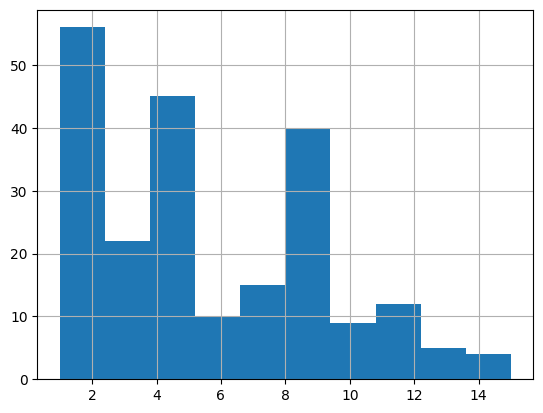

In [ ]:
# @title Longitudes sin agrupar en intervalos: ¿Cuál es la moda?
# Calcular la tabla de frecuencias de la columna 'Grupo'
freq_longitudes = pal_long['longitudes'].value_counts()
freq_longitudes = freq_longitudes.sort_index()
print(freq_longitudes)
pal_long['longitudes'].hist()

In [ ]:
# @title Longitudes agrupadas por intervalos: ¿Cuál es la moda?
tabla_frecuencias_eje3

,x_i,n_i,f_i,N_i,F_i,Marca_de_clase
0,[1-3),56,0.256881,56,0.256881,2.0
1,[3-4),43,0.197248,99,0.454128,3.5
2,[4-6),24,0.110092,123,0.564220,5.0
3,[6-7),25,0.114679,148,0.678899,6.5
4,[7-9),29,0.133028,177,0.811927,8.0
5,[9-10),20,0.091743,197,0.903670,9.5
6,[10-12),9,0.041284,206,0.944954,11.0
7,[12-13),8,0.036697,214,0.981651,12.5
8,[13-15),4,0.018349,218,1.000000,14.0


### Moda pros y contras:

### Pros:
- Es muy fácil de calcular, sobre todo para variables descritas por las frecuencias de sus valores, ya que consiste en identificar el (los) valor(es) con frecuencia máxima. Si la variable está reducida por intervalos de igual amplitud, podremos obtener la moda de esta manera.

### Contras:
- Realmente no es una medida de posición central. Sin embargo, para variables unimodales y con cierta simetría (esta característica se puede apreciar en el gráfico de barras de frecuencias o en el histograma), sí que representa una centralidad.
- Cuando los valores de la variable no se repiten, no tiene sentido (no nos da ninguna información) ya que todos los valores son modas.
Ejemplo: para la distribución $X=(2, 5, 7, 9, 12)$ todos los valores son moda.


***
## Cuantiles:
***

Las ***medidas de posición no central*** más conocidas son los cuantiles, que podemos ver como una generalización de la mediana:

La *mediana* es el cuantil de orden 2: separa los valores ordenados en dos bloques iguales en número de casos.

Los cuartiles $Q_{1}$, $Q_{2}$ y $Q_{3}$son los cuantiles de orden 4: separan los valores ordenados en cuatro bloques iguales en número de casos.

Los percentiles $P_{1}$, $P_{2}$, ..., $P_{99}$ son los de orden 100, y separan los valores ordenados en 100 bloques iguales en número de casos.

Los deciles $D_{1}$, $D_{2}$, ..., $D_{9}$ son los de orden 10.

Otros cuantiles menos habituales: los terciles (orden 3), los quintiles (orden 5) …


## ¿Cómo se calculan?:

Ordenamos los datos: $X_{1} \leq X_{1} \leq ... \leq X_{N}$.

Para el orden $q$ se definen $q-1$ cuantiles de número $r=1, 2, ..., q-1$.

El 𝑟-ésimo cuantil de orden $q$ es el valor que ocupa la posición $\frac{r}{q}(N+1)$:
- si el resultado de la posición es entero, reportamos el valor de esa posición, $X_{i}$ tal que $$i=\frac{r}{q}(N+1)$$
- en otro caso, reportamos la media aritmética de los valores que ocupan las posiciones inmediatamente anterior y posterior a la posición obtenida, esto es, $$\frac{X_{i}+X_{i+1}}{2}$$
tal que $i < \frac{r}{q}(N+1) < i+1$.

**Observación**. Muchos cuantiles de distintos ordenes coinciden, por ejemplo:
$Q_{1} = P_{2}$ (la cuarta parte es el 25%);

$Q_{2} = Me = P_{50}$ (2/4=1/2=50/100);

$Q_{3} = P_{75}$ (3/4=75/100).


### Cuantiles: Ejercicio:
Calcular los cuantiles

El objetivo de este ejercicio es calcular los diferentes cuantiles de la longitud de las palabras del texto:

***Texto:***

**Este texto que estás leyendo ahora mismo sirve como un ejemplo ilustrativo para calcular el número mediano de la longitud de palabras dentro de un texto determinado. Es un ejercicio práctico que nos permite comprender cómo funcionan los cálculos de estadísticas descriptivas aplicadas al análisis lingüístico.
En este contexto, la longitud de las palabras se refiere al número de caracteres que componen cada palabra individualmente. Al analizar este texto, encontrarás palabras cortas, como "este", "es", "un", "de", así como palabras más largas como "ilustrativo", "estadísticas", "descriptivas", entre otras.
El objetivo es determinar el número mediano de caracteres que conforman las palabras en este texto. Al calcular este valor, podemos tener una idea más clara de la extensión promedio de las palabras utilizadas aquí. Este proceso implica ordenar las longitudes de las palabras de menor a mayor y encontrar el valor medio.
Este ejercicio es útil en diversos contextos, desde análisis de texto en lingüística computacional hasta la elaboración de informes y análisis de contenido en campos como la investigación académica, la publicidad y el procesamiento del lenguaje natural.
Es importante destacar que el cálculo del número mediano de longitud de palabras nos brinda información valiosa sobre la estructura y complejidad del lenguaje utilizado, lo que puede tener implicaciones significativas en la comunicación efectiva y la comprensión del texto.**


Recordemos que en el ejercicio anterior limpiamos el texto, por lo que utilizaremos la variable creada **texto_limpio**.
Calcularemos los valores que dividen la distribución de la longitud de las palabras, primero en 4 partes iguales, es decir los cuartiles, y luego en 10 partes iguales, es decir, los deciles.

In [ ]:
# @title Cálculo de los cuartiles y deciles de la longitud de palabras del texto de ejemplo:
try:
    pal_long = pal_long.sort_values(by="longitudes").reset_index()
except:
    pass

display(pal_long[['longitudes']])
N_1=N_ej3+1
print("------------------------------------------------------------\n------------------------------------------------------------\n")

#por ejemplo los cuartiles:
q=4 #entonces q-1 grupos
print("------------------------------------------------------------\nPara los cuartiles\n------------------------------------------------------------\n")
for r in range(1,q):
    i=(r/q)*N_1

    if i.is_integer():
        cuant =  pal_long.loc[int(i)-1,'longitudes']
    else:
        # lower_index = int(i) - 1
        # upper_index = int(i)
        # cuant = (pal_long.iloc[lower_index]['longitudes'] + pal_long.iloc[upper_index]['longitudes']) / 2
        lower_index = int(i) - 1
        upper_index = int(i)
        diff_lower = abs(i - int(i))
        diff_upper = abs(int(i) - i + 1)
        if diff_lower < diff_upper:
            cuant= pal_long.iloc[lower_index]['longitudes']
        else:
            cuant= pal_long.iloc[upper_index]['longitudes']

    print(f"La longitud que representa el cuartil {r} es {cuant}")
print("------------------------------------------------------------\nPara los deciles\n------------------------------------------------------------\n")

#por ejemplo los deciles:
q=10 #entonces q-1 grupos
for r in range(1,q):
    i=(r/q)*N_1
    if i.is_integer():
        cuant =  pal_long.loc[int(i)-1,'longitudes']
    else:
        # lower_index = int(i) - 1
        # upper_index = int(i)
        # cuant = (pal_long.iloc[lower_index]['longitudes'] + pal_long.iloc[upper_index]['longitudes']) / 2

        lower_index = int(i) - 1
        upper_index = int(i)
        diff_lower = abs(i - int(i))
        diff_upper = abs(int(i) - i + 1)
        if diff_lower < diff_upper:
            cuant= pal_long.iloc[lower_index]['longitudes']
        else:
            cuant= pal_long.iloc[upper_index]['longitudes']

    print(f"La longitud que representa el decil {r} es {cuant}")

,longitudes
0,1
1,1
2,1
3,1
4,1
...,...
213,13
214,14
215,14
216,14


------------------------------------------------------------
------------------------------------------------------------

------------------------------------------------------------
Para los cuartiles
------------------------------------------------------------

La longitud que representa el cuartil 1 es 2
La longitud que representa el cuartil 2 es 5
La longitud que representa el cuartil 3 es 8
------------------------------------------------------------
Para los deciles
------------------------------------------------------------

La longitud que representa el decil 1 es 2
La longitud que representa el decil 2 es 2
La longitud que representa el decil 3 es 3
La longitud que representa el decil 4 es 4
La longitud que representa el decil 5 es 5
La longitud que representa el decil 6 es 6
La longitud que representa el decil 7 es 8
La longitud que representa el decil 8 es 8
La longitud que representa el decil 9 es 10


In [ ]:
# @title Cálculo de cuartiles y deciles usando función de Python:
# Calculamos los cuantiles: cuartiles
cuantiles = [0.25, 0.50, 0.75]
resultados_cuantiles = pal_long['longitudes'].quantile(cuantiles, interpolation='nearest')
# Mostramos los resultados
print("\nCuartiles:")
print(resultados_cuantiles)

print("------------------------------------------------------------------------")

deciles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
resultados_deciles = pal_long['longitudes'].quantile(deciles, interpolation='nearest')

# Mostramos los resultados
print("Deciles:")
print(resultados_deciles)


Cuartiles:
0.25    2
0.50    5
0.75    8
Name: longitudes, dtype: int64
------------------------------------------------------------------------
Deciles:
0.1     2
0.2     2
0.3     3
0.4     4
0.5     5
0.6     6
0.7     8
0.8     8
0.9    10
Name: longitudes, dtype: int64


### Cuartiles para una variable por intervalo
Si la variable $X$ está reducida por intervalos, tomaremos como cuantil r-ésimo de orden $q$ la marca de clase del primer intervalo tal que su frecuencia absoluta acumulada sea mayor o igual a $\frac{r}{q}(N+1)$.
De manera equivalente, también podemos obtenerlo buscando el primer intervalo tal que su frecuencia absoluta relativa sea mayor o igual a $\frac{r}{q}$.
Esto es, el intervalo $i$ tal que:

$$N_{i} \geq \frac{r}{q}(N+1)$$
y
$$N_{i-1} < \frac{r}{q}(N+1)$$

O de manera equivalente, $F_{i} \geq \frac{r}{q} $ y $F_{i-1} < \frac{r}{q} $



In [ ]:
# @title ### **Ejercicio de cuantiles:** Calcular los cuantiles de datos agrupados por intervalos: El objetivo de este ejercicio es calcular los diferentes cuantiles de la longitud de las palabras del texto que está por agregada por intervalos (ver tabla *tabla_frecuencias_eje3*)
print(tabla_frecuencias_eje3)

       x_i  n_i       f_i  N_i       F_i  Marca_de_clase
0    [1-3)   56  0.256881   56  0.256881             2.0
1    [3-4)   43  0.197248   99  0.454128             3.5
2    [4-6)   24  0.110092  123  0.564220             5.0
3    [6-7)   25  0.114679  148  0.678899             6.5
4    [7-9)   29  0.133028  177  0.811927             8.0
5   [9-10)   20  0.091743  197  0.903670             9.5
6  [10-12)    9  0.041284  206  0.944954            11.0
7  [12-13)    8  0.036697  214  0.981651            12.5
8  [13-15)    4  0.018349  218  1.000000            14.0


In [ ]:
# @title Solución cuantiles por intervalos: { vertical-output: true }
#cuartiles:
print(f"\nLos cuartiles de los datos agrupados por intervalos son:\n")
q=4
for i in range(1,q):
    pto=i/q
    q_i=round(tabla_frecuencias_eje3.loc[(tabla_frecuencias_eje3['F_i'] >= pto).idxmax(),"Marca_de_clase"])
    print(f"El cuartil {i} de longitud de palabras del texto de prueba es: {q_i}")


print(f"\nLos Deciles de los datos agrupados por intervalos son:\n")
q=10
for i in range(1,q):
    pto=i/q
    q_i=round(tabla_frecuencias_eje3.loc[(tabla_frecuencias_eje3['F_i'] >= pto).idxmax(),"Marca_de_clase"])
    print(f"El decil {i} de longitud de palabras del texto de prueba es: {q_i}")


Los cuartiles de los datos agrupados por intervalos son:

El cuartil 1 de longitud de palabras del texto de prueba es: 2
El cuartil 2 de longitud de palabras del texto de prueba es: 5
El cuartil 3 de longitud de palabras del texto de prueba es: 8

Los Deciles de los datos agrupados por intervalos son:

El decil 1 de longitud de palabras del texto de prueba es: 2
El decil 2 de longitud de palabras del texto de prueba es: 2
El decil 3 de longitud de palabras del texto de prueba es: 4
El decil 4 de longitud de palabras del texto de prueba es: 4
El decil 5 de longitud de palabras del texto de prueba es: 5
El decil 6 de longitud de palabras del texto de prueba es: 6
El decil 7 de longitud de palabras del texto de prueba es: 8
El decil 8 de longitud de palabras del texto de prueba es: 8
El decil 9 de longitud de palabras del texto de prueba es: 10


***
## Medidas de dispersión absoluta:
***

Cuantifican cuánto ***varía*** la variable de estudio (cómo los valores se distinguen de sus valores centrales).

* **Desviación típica**:
Geométricamente, la **desviación típica** mide lo lejos que está la variable de ser constante, en concreto de tomar siempre el valor $\bar{X}$:

$$\sigma_{X}=\sqrt{\frac{1}{N}\sum_{i=1}^{N}(X_{i}-\mu_{X})^{2}}$$

* **Varianza**:
Es definida como el cuadrado de la desviación típica.
$$Var(X) = \sigma_{X}^{2}=\frac{1}{N}\sum_{i=1}^{N}(X_{i}-\mu_{X})^{2}$$

donde $N$ es el tamaño de la población y $\mu_{X}$ es conocida como la media poblacional.


### ¿Cómo se calcula la varianza?

Las siguientes expresiones son equivalentes para calcular la varianza, que dependiendo de la información de la que dispongamos nos pueden facilitar su cálculo. Esto nos permite definir la varianza como la diferencia de la media de los cuadrados con respecto al cuadrado de la media:


$$Var(X) = \sigma_{X}^{2}=\frac{1}{N} \sum_{i=1}^{N}(x_{i}-\mu_{X})^{2} = \frac{1}{N}\sum_{i=1}^{N}X_{i}^{2}-\mu_{X}^{2} = \bar{X^{2}}-\mu_{X}^{2} = \frac{1}{N}\Big(\sum_{i=1}^{N}X_{i}^{2}-\frac{(\sum_{i=1}^{N}X_{i})^{2}}{N}\Big)$$

La última expresión es la más recomendable para realizar las cuentas manualmente: requiere la suma y la suma de cuadrados.

Si $X$ está reducida por intervalos entonces se aproximan $\sigma_{X}$ y $\sigma_{X}^{2}$ usando las marcas de clase, como en el caso de la media $\bar{X}$.








In [ ]:
# @title ***Ejemplo de cálculo de varianza y desviación típica:*** El propósito de este ejercicio es calcular la varianza y la desviación estándar de la longitud de las palabras del texto dado. Utilizaremos el mismo texto de ejemplo de los ejercicios anteriores y realizaremos los cálculos paso a paso.
display(pal_long[['longitudes']])

# Calculamos la media
media = sum(longitudes) / len(longitudes)
print("Media:", media)

# Calculamos la suma de los cuadrados de las diferencias
suma_cuadrados_diferencias = sum((x - media) ** 2 for x in longitudes)
print("Suma de los cuadrados de las diferencias:", suma_cuadrados_diferencias)

# Calculamos la varianza
varianza = suma_cuadrados_diferencias / len(longitudes)
print("Varianza:", varianza)

# Calculamos la desviación estándar
desviacion_estandar = varianza ** 0.5
print("Desviación estándar:", desviacion_estandar)





,longitudes
0,1
1,1
2,1
3,1
4,1
...,...
213,13
214,14
215,14
216,14


Media: 5.591743119266055
Suma de los cuadrados de las diferencias: 2444.665137614679
Varianza: 11.21406026428752
Desviación estándar: 3.3487401010361375


In [ ]:
# @title Cálculo a través de funciones de Python (dentro de la librería Numpy):
# Calculamos la varianza y la desviación típica con numpy
varianza_np = np.var(longitudes)
desviacion_estandar_np = np.std(longitudes)

print("Varianza (con numpy):", round(varianza_np,2))
print("Desviación estándar (con numpy):", round(desviacion_estandar_np,2))

Varianza (con numpy): 11.21
Desviación estándar (con numpy): 3.35


### Propiedades de la desviación típica y la varianza:

Propiedades de la Varianza:

* La varianza es una medida no negativa, es decir, $\sigma^{2}_{X} \geq 0$ para cualquier variable aleatoria $X$.
    
* La varianza es cero si y solo si todos los valores de la variable aleatoria son iguales, es decir, $\sigma_{X}^{2} = 0 \iff X = c$ para algún $c \in \mathbb{R}$.
    
* La varianza de una constante multiplicada por una variable aleatoria es igual a la constante al cuadrado multiplicada por la varianza de la variable aleatoria, es decir, $\sigma_{cX}^{2} =  c^{2}\sigma^{2}_{X}$.
    
* La varianza de la suma de dos variables aleatorias independientes es igual a la suma de sus varianzas, es decir, $\sigma^{2}_{X + Y} = \sigma^{2}_{X} + \sigma^{2}_{Y}$ para variables aleatorias $X$ e $Y$ independientes.


Propiedades de la Desviación Típica:
    
* Al igual que la varianza, la desviación típica es una medida no negativa, es decir, $\sigma_{X} \geq 0$.
    
* La desviación típica mide la dispersión de los datos alrededor de la media de la misma manera que la varianza, pero está en la misma escala que los datos originales, lo que facilita su interpretación.
    
* Las propiedades de la desviación típica son esencialmente las mismas que las de la varianza, ya que la desviación típica es simplemente la raíz cuadrada de la varianza.

***Ejemplo:***

Supongamos que tenemos una variable aleatoria $X$ cuyos valores son $1, 2, 3$ con igual probabilidad.

Queremos calcular la varianza de $2X$.


Primero, calculemos la media de $X$:
$$
\bar{X} = \frac{1+2+3}{3} = 2.
$$

La varianza de $X$ es:
$$
Var(X) = E[(X - \mu_{X})^2] = \frac{(1-2)^2 + (2-2)^2 + (3-2)^2}{3} = \frac{2}{3}.
$$

Aplicando la propiedad, obtenemos:
$$
Var(2X) = 2^2 \cdot Var(X) = 4 \cdot \frac{2}{3} = \frac{8}{3}.
$$




### Cuasivarianza y cuasidesviación típica
La cuasivarianza y la cuasidesviación típica se definen de manera muy similar a la sus versiones *plenas*. La única diferencia es que, en este caso, se divide por $n-1$, donde $n$ es el tamaño de la mustra y se usa cuando solo se tiene acceso a una muestra de los datos en lugar de toda la población.

$$S_{X}=\sqrt{\frac{1}{(n-1)}\sum_{i=1}^{n}(X_{i}-\bar{X})^{2}}$$
$$Var(X) = S_{X}^{2}=\frac{1}{(n-1)}\sum_{i=1}^{n}(X_{i}-\bar{X})^{2},$$
donde $\bar{X}$ es la media estimada en la muestra.

- Las propiedades son las mismas que en el caso de la varianza y la desviación típica.
<!-- <font color='red'>bar</font> -->

In [ ]:
# @title Calculamos la (cuasi) varianza y la (cuasi) desviación típica con numpy
varianza_np = np.var(longitudes, ddof=1) #con ddof=1 es para ajustar el divisor a n-1
desviacion_estandar_np = np.std(longitudes, ddof=1)

print("Varianza (con numpy):", round(varianza_np,2))
print("Desviación estándar (con numpy):", round(desviacion_estandar_np,2))


Varianza (con numpy): 11.27
Desviación estándar (con numpy): 3.36


***
## Análisis de frecuencia de los N-gramas:
***

El análisis de frecuencia de los n-gramas es una técnica fundamental en el procesamiento de lenguaje natural (PLN) que se utiliza para analizar la frecuencia de ocurrencia de secuencias de $N$ elementos, conocidas como n-gramas, en un texto. Los n-gramas son ampliamente utilizados en tareas como la modelización del lenguaje, la traducción automática, la corrección ortográfica, entre otros.

**Definición:**
Un n-grama es una secuencia contigua de $N$ elementos de un texto o una cadena de caracteres. Los elementos pueden ser palabras, caracteres, sílabas, entre otros. Por ejemplo, en la oración *El perro corre rápidamente*, algunos ejemplos de n-gramas serían los siguientes:

* Unigramas (1-gramas): El, perro, corre, rápidamente.
* Bigramas (2-gramas): El perro, perro corre, corre rápidamente.
* Trigramas (3-gramas): El perro corre, perro corre rápidamente.


**Cálculo de Frecuencia:**

Para calcular la frecuencia de los n-gramas en un texto, se cuentan las ocurrencias de cada n-grama y se registran en una tabla. Luego, se puede calcular la frecuencia relativa de cada n-grama dividiendo el número de ocurrencias de ese n-grama por el número total de n-gramas en el texto.

**Implementación en Python:**

A continuación, se muestra una implementación simple en Python para calcular la frecuencia de los n-gramas en un texto utilizando la biblioteca NLTK (Natural Language Toolkit):

Este script tomará el texto de ejemplo, lo tokenizará en palabras, calculará los bigramas y mostrará la frecuencia de cada bigrama en el texto.


In [ ]:
# # from nltk.tokenize import word_tokenize
# # from nltk.stem import WordNetLemmatizer
# # import string


# # nltk.download('wordnet')
# df2=df.copy()
# df2["cleanText"]=df2["Text"].apply(limpiar_texto)
# # Función para limpiar el texto
# def clean_text(text):
#     # Tokenizar el texto
#     tokens = word_tokenize(text.lower())  # Convertir a minúsculas y tokenizar
#     # Eliminar puntuación y caracteres especiales
#     tokens = [token for token in tokens if token not in string.punctuation]
#     # Eliminar palabras vacías (stopwords)
#     tokens = [token for token in tokens if token not in stopword_en]
#     # Lematización
#     lemmatizer = WordNetLemmatizer()
#     tokens = [lemmatizer.lemmatize(token) for token in tokens]
#     return tokens

# # Aplicar la limpieza de texto a la columna 'Text'
# df2['Clean_Text'] = df2['cleanText'].apply(clean_text)


# # Tokeniza el texto de la columna "Text"

# # df2['Tokenized_Text'] = df2['Clean_Text'].apply(word_tokenize)
# # display(df2)

# # Ahora puedes proceder a calcular los n-gramas con el texto limpio.


In [ ]:
# # Función para calcular los n-gramas de una lista de tokens
# def calculate_ngrams(tokens, n):
#     return list(ngrams(tokens, n))

# # Calcula los n-gramas para cada reseña y almacena los resultados en una nueva columna
# n = 2  # Puedes ajustar este valor para obtener n-gramas de diferente longitud
# df2['Ngrams'] = df2['Clean_Text'].apply(lambda x: calculate_ngrams(x, n))


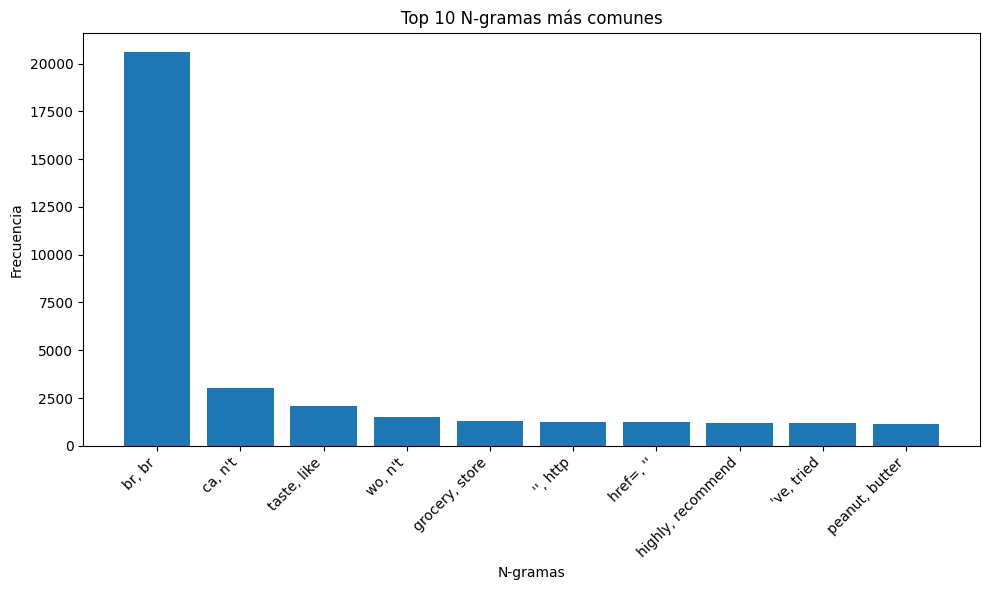

In [ ]:
# import matplotlib.pyplot as plt
# from collections import Counter

# # Obtén todos los n-gramas en una lista
# all_ngrams = [ngram for sublist in df2['Ngrams'] for ngram in sublist]

# # Calcula la frecuencia de cada n-grama
# ngram_freq = Counter(all_ngrams)

# # Obtén los n-gramas más comunes (puedes ajustar el número)
# top_ngrams = ngram_freq.most_common(10)

# # Separa los n-gramas y sus frecuencias
# ngram, freq = zip(*top_ngrams)

# # Crea el gráfico de barras
# plt.figure(figsize=(10, 6))
# plt.bar(range(len(ngram)), freq, tick_label=[', '.join(item) for item in ngram])
# plt.xlabel('N-gramas')
# plt.ylabel('Frecuencia')
# plt.title('Top 10 N-gramas más comunes')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


El perro : 1
perro corre : 1
corre rápidamente : 1
rápidamente por : 1
por el : 1
el parque : 1
parque . : 1


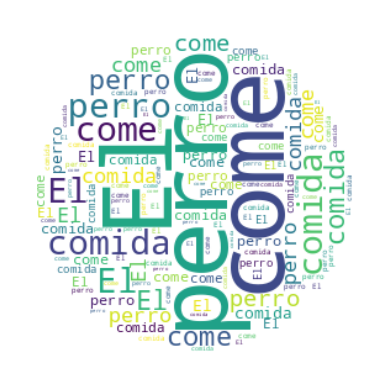

In [ ]:
# # Texto de ejemplo
# texto = "El perro corre rápidamente por el parque."

# # Tokenización del texto en palabras
# palabras = nltk.word_tokenize(texto)

# # Definir el valor de n para los n-gramas
# n = 2

# # Calcular los n-gramas
# ngramas = ngrams(palabras, n)

# # Calcular la frecuencia de los n-gramas
# frecuencia_ngramas = nltk.FreqDist(ngramas)

# # Mostrar los n-gramas y su frecuencia
# for ngrama, frecuencia in frecuencia_ngramas.items():
#     print(' '.join(ngrama), ':', frecuencia)

# #gráfico:
# x, y = np.ogrid[:300, :300]
# mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
# mask = 255 * mask.astype(int)
# wc = WordCloud(background_color = "white", repeat = True, mask = mask)
# wc.generate(text)
# plt.axis("off")
# plt.imshow(wc, interpolation = "bilinear")

***
***

# Probabilidad ¡La clave!




<center>
 <img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/prob.png?raw=1" alt="prob" width="50%" height="50%">
</center>

**Motivación**

Frente a un fenómeno aleatorio, el resultado es incierto y su predicción se vuelve un desafío. La probabilidad se convierte en nuestra brújula en este territorio de incertidumbre.

**Analicemos ejemplos:**

# ***¿Cuál será el siguiente término en una secuencia de palabras generada por un modelo de lenguaje?***

Aunque no podemos predecir exactamente qué palabra seguirá, podemos calcular la probabilidad condicional de que una palabra determinada siga a otra dentro del contexto de la secuencia.

# ***¿Qué tan probable es que un mensaje de texto sea spam?***
No podemos afirmar con certeza si un mensaje es spam o no, pero podemos usar técnicas de procesamiento del lenguaje natural, como la clasificación de texto, para calcular la probabilidad de que un mensaje en particular sea spam basado en características como las palabras utilizadas y el contexto.

# ***¿Cuál es la probabilidad de que un documento sea relevante para una consulta de búsqueda?***
Al buscar en un motor de búsqueda, no podemos predecir con certeza qué documentos serán relevantes para la consulta del usuario. Sin embargo, podemos utilizar algoritmos de procesamiento del lenguaje natural y modelos de recuperación de información para calcular la probabilidad de relevancia de un documento en función de la coincidencia de palabras clave y la semántica del texto.




## Conceptos:




### Distribución de probabilidad:

La distribución de probabilidad es una función matemática que describe las posibles ocurrencias de un evento y la probabilidad asociada a cada una de ellas. En otras palabras, indica cómo se distribuyen las probabilidades entre los diferentes resultados posibles de un fenómeno aleatorio.

Una **distribución de probabilidad** es una función $ P: \{ sucesos \} \rightarrow [0,1]$.

Denotamos por $\Omega$ al conjunto total de resultados posibles, donde cada elemento en $ \Omega$ se llama suceso elemental.
El suceso imposible se denota como $\emptyset$.

Un suceso es un conjunto formado mediante la unión, intersección o complementación de **sucesos elementales**. Si $A$ es un **suceso**, $P(A)$  es la probabilidad de $A$, donde $ 0 \leq P(A) \leq 1$.

Para dos sucesos $A$ y $B$:
* $A \cup B $ representa la unión de $A$ y $B$, se cumple si al menos uno de los dos sucesos ocurre.
* $A \cap B$ representa la intersección de $A$ y $B$, se cumple si ambos sucesos ocurren.
* $A^c$ es el complemento de $A$: se cumple exactamente cuando $A$ no ocurre.

**Propiedades:**
Una distribución de probabilidad $P(X)$ para una variable aleatoria discreta $X$ debe satisfacer las siguientes propiedades:
1. $0 \leq P(X = x_i) \leq 1$ para todo valor de $x_i$.
2. La suma de las probabilidades para todos los posibles valores de $X$ es igual a 1:
$ \sum_{i} P(X = x_i) = 1 $.

Además:

*  El **suceso total** es $P(\Omega)=1$.
*  $P(\emptyset)=0$

### Regla de Laplace

En el caso en el que los sucesos elementales sean equiprobables, podemos calcular la probabilidad de un suceso $A$ de la siguiente forma:

$$P(A)=\frac{|A|}{|\Omega|} = \frac{\text{# de casos favorables}}{\text{# de casos posibles}}$$

***Ejemplos:***

Teniendo en cuenta el texto que venimos trabajando, y suponiendo que deseamos calcular la probabilidad de seleccionar una palabra de longitud mayor o igual a 10 caracteres al azar del texto proporcionado. ¿Cuál es la probabilidad de que una palabra elegida al azar tenga esta longitud o mayor?

In [ ]:
# Dividir el texto en palabras
palabras = texto_limpio.split()

# Contar cuántas palabras tienen una longitud mayor o igual a 10 caracteres
num_palabras_largas = sum(1 for palabra in palabras if len(palabra) >= 10)

# Calcular la probabilidad

probabilidad = num_palabras_largas / len(palabras)

print("Número total de palabras (# de casos posibles):", len(palabras))
print("Número de palabras con longitud mayor o igual a 10 (# de casos favorables):", num_palabras_largas)
print("Probabilidad de seleccionar una palabra de longitud mayor o igual a 10:", probabilidad)

Número total de palabras (# de casos posibles): 218
Número de palabras con longitud mayor o igual a 10 (# de casos favorables): 30
Probabilidad de seleccionar una palabra de longitud mayor o igual a 10: 0.13761467889908258


***Ejercicio:***
¿Cuál es la probabilidad de que al seleccionar una palabra al azar del texto de ejemplo, comience por la letra *e*? sabiendo que hay 35 palabras, de las 218 que comienzan por e.

In [ ]:
# @title Rta:
# Dividir el texto en palabras
palabras = texto_limpio.split()
# Contar cuántas palabras comienzan con la letra "e"
num_palabras_e = sum(1 for palabra in palabras if palabra.lower().startswith('e'))

# Calcular la probabilidad
probabilidad_palabra_e = num_palabras_e / len(palabras)

print("Número total de palabras:", len(palabras))
print("Número de palabras que comienzan con 'e':", num_palabras_e)
print("Probabilidad de que una palabra comience con 'e':", probabilidad_palabra_e)

Número total de palabras: 218
Número de palabras que comienzan con 'e': 35
Probabilidad de que una palabra comience con 'e': 0.16055045871559634


### Probabilidad condicionada

Dados dos sucesos, $A$ y $B$, si $n_{A \cap B}$ es la frecuencia de resultados en los que se cumplen $A$  y $B$ a la vez en $N$ *experimentos*, entonces $\frac{n_{A \cap B}}{n_{B}}$ expresa la proporción de casos en los que sucede $A$ entre los que sucede $B$.

Como $$\frac{n_{A \cap B}}{n_{B}} = \frac{n_{A \cap B}/N}{n_{B}/N} \xrightarrow[N \rightarrow +\infty]{}\frac{P(A \cap B)}{P(B)},$$

se define la **probabilidad de $A$ condiciona a $B$** como la probabilidad de $A$ si damos por supuesto que sucede $B$, esto es:

$$P(A|B)=\frac{P(A \cap B)}{P(B)}$$.



***Ejemplo:***

Supongamos que queremos calcular la probabilidad de que una palabra seleccionada al azar del texto comience con la letra "e", dado que esa palabra tiene una longitud mayor o igual a 10 caracteres.

Para calcular esta probabilidad condicionada, primero necesitamos contar el número de palabras que cumplen con ambas condiciones (longitud mayor o igual a 10 caracteres y comienzo con "e"), y luego dividirlo por el número total de palabras que tienen una longitud mayor o igual a 10 caracteres.

In [ ]:
# Dividir el texto en palabras
palabras = texto_limpio.split()

# Contar palabras con longitud mayor o igual a 10 caracteres
num_palabras_largas = sum(1 for palabra in palabras if len(palabra) >= 10)

# Contar palabras que comienzan con "e" y tienen longitud mayor o igual a 10 caracteres
num_palabras_e_largas = sum(1 for palabra in palabras if len(palabra) >= 10 and palabra.lower().startswith('e'))

# Calcular la probabilidad condicionada
probabilidad_condicionada = num_palabras_e_largas / num_palabras_largas

print("Número total de palabras con longitud mayor o igual a 10:", num_palabras_largas)
print("Número de palabras que comienzan con 'e' y tienen longitud mayor o igual a 10:", num_palabras_e_largas)
print("Probabilidad de que una palabra comience con 'e' dado que tiene longitud mayor o igual a 10:", probabilidad_condicionada)

Número total de palabras con longitud mayor o igual a 10: 30
Número de palabras que comienzan con 'e' y tienen longitud mayor o igual a 10: 4
Probabilidad de que una palabra comience con 'e' dado que tiene longitud mayor o igual a 10: 0.13333333333333333


***Ejercicio:***

En el texto dado, consideramos las palabras que tienen una longitud menor a 5 caracteres. Si seleccionamos una palabra al azar de entre estas palabras, ¿cuál es la probabilidad de que esa palabra termine con la letra "s"?

In [ ]:
# @title Rta
# Dividir el texto en palabras
palabras = texto_limpio.split()

# Contar palabras con longitud menor a 5 caracteres
num_palabras_cortas = sum(1 for palabra in palabras if len(palabra) < 5)

# Contar palabras que terminen con "s" y tienen longitud menora 5 caracteres
num_palabras_s_cortas = sum(1 for palabra in palabras if len(palabra) < 5 and palabra.lower().endswith('s'))

# Calcular la probabilidad condicionada
probabilidad_condicionada = num_palabras_s_cortas / num_palabras_cortas

print("Número total de palabras con longitud menor a 5:", num_palabras_cortas)
print("Número de palabras que terminan con 's' y tienen longitud menor a 10:", num_palabras_s_cortas)
print("Probabilidad de que una palabra termine con 's' dado que tiene longitud menor a 5:", probabilidad_condicionada)

Número total de palabras con longitud menor a 5: 99
Número de palabras que terminan con 's' y tienen longitud menor a 10: 14
Probabilidad de que una palabra termine con 's' dado que tiene longitud menor a 5: 0.1414141414141414


### Propiedades de la probabilidad condicional:

   
* Independencia: Dos eventos $A$ y $B$ son independientes si y solo si la probabilidad de que ocurra $A$ no se ve afectada por la ocurrencia de $B$, y viceversa. Esto se expresa matemáticamente como:

$$P(A|B) = P(A) \quad \text{y} \quad P(B|A) = P(B)$$
        
* Regla del Producto: La probabilidad de la intersección de dos eventos $A$ y $B$ puede calcularse utilizando la probabilidad condicionada:

$$P(A \cap B) = P(A|B) \cdot P(B)$$
        
* Teorema de Bayes: Es una herramienta poderosa que nos permite actualizar nuestras creencias sobre la ocurrencia de un evento $A$ dado que ha ocurrido otro evento $B$.

    Como $$P(A|B)=\frac{P(A \cap B)}{P(B)} \quad \text{y} \quad P(B|A)=\frac{P(A \cap B)}{P(A)},$$

    y
    
    $$P(A \cap B) =P(B) \cdot P(A|B) = P(A) \cdot P(B|A)$$

    Entonces:
    
    $$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$
    

### Variables aleatorias:

Una variable aleatoria (v.a.) es como un *contenedor* de resultados posibles en un experimento. Piensa en ella como una herramienta que nos ayuda a asignar números a los resultados de un evento que no es fijo (aleatorio).

Por ejemplo, imagina que estás lanzando un dado. Cada vez que lo lanzas, obtienes un número diferente. Ese número que obtienes, ya sea un 1, un 2, un 3, hasta un 6, es el valor de tu variable aleatoria para ese lanzamiento.

Si estás midiendo la temperatura de una habitación y obtienes diferentes lecturas cada vez que tomas la temperatura, entonces esa temperatura medida es una variable aleatoria. Puedes obtener 25 grados, 25.5 grados, 26 grados, etc.

En resumen, una variable aleatoria es una manera de representar numéricamente los resultados de un experimento aleatorio. No es solo un número aleatorio, sino una manera de organizar y entender la información que obtenemos de nuestros experimentos.


**Formalmente:**

En términos más formales, una (v.a.) es una función que asigna un número real a cada resultado posible de un experimento aleatorio. Si denotamos la variable aleatoria como $X$, entonces para cada resultado $x$ del experimento, $X$ asigna un valor que es un número real ($x \in \mathbb{R}$):

$$X: \Omega \rightarrow \mathbb{R}$$




### Variables aleatorias discretas:

Una v.a. es discreta si la cantidad de valores que puede tomar es numerable:
$$x_{1}, x_{2}, x_{3},...$$

En una v.a. discreta $ p_{k}= P(X=k)$ es la función de probabilidad o de masa. Se cumple $\sum p_{x_{i}}=1$, esto es, las probabilidades de todos los valores que la v.a. discreta puede tomar suman 1.

***Ejemplos:***


### Variables aleatorias continuas:

Una v.a. **continua** $X$ cumple que para todo número $k$, la probabilidad de que $X$ lo tome es nula, esto es $P(X=k)=0$. La probabilidad que interesa es la de que tome valores en cualquier intervalo, esto es:
* La probabilidad de (a,b) es $P(a < x < b)$, que es la misma que la de $[a,b]$, $[a,b)$ ó $(a,b]$.
* La probabilidad de $(a, +\infty)$ es $P(X>a)$.
* La probabilidad de $(-\infty, a)$ es $P(X<a)$.

***Ejemplos:***


### Función de densidad:

Dada $X$ una v.a. continua, una función $f\geq0$ es la función de densidad de $X$ si la probabilidad de $(a,b)$ es igual al área de la región limitada por la gráfica $y=f(x)$, y las rectas $y=0$, $x=a$ y $x=b$.


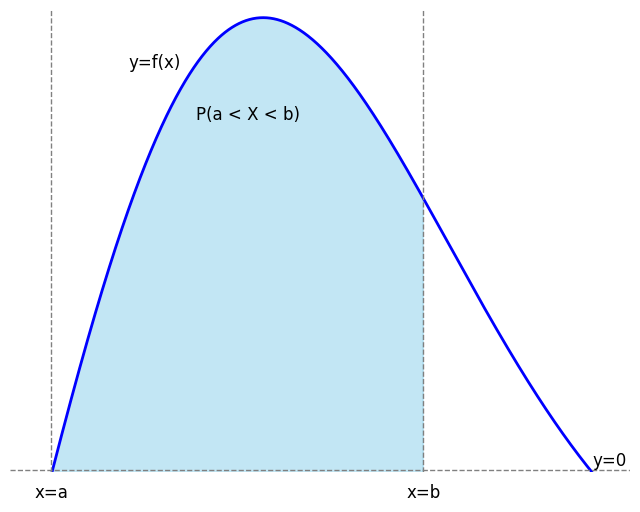

In [ ]:
# @title función de densidad { vertical-output: true, display-mode: "form" }
# Definir la función de densidad de probabilidad (PDF)
def f(x):
    # Puedes definir tu propia función de densidad aquí
    funcion= x * np.exp(-x**2 / 3) / np.sqrt(2 * np.pi)
    return funcion

# Definir los límites del intervalo [a, b]
a = 0.2
b = 3

# Generar valores de x en el intervalo [a, b]
x_values = np.linspace(a, b, 1000)

# Calcular los valores de y = f(x)
y_values = f(x_values)

# Crear la gráfica
plt.figure(figsize=(8, 6))

# Graficar la función de densidad de probabilidad (PDF)
plt.plot(x_values, y_values, 'b-', linewidth=2)

# Rellenar el área bajo la curva entre x=a y x=b
plt.fill_between(x_values, 0.05, y_values, where=(x_values >= a) & (x_values <= b-1), color='skyblue', alpha=0.5)

# Líneas verticales en x=a y x=b
plt.axvline(x=a, color='gray', linestyle='--', linewidth=1)
plt.axvline(x=b-1, color='gray', linestyle='--', linewidth=1)

# Líneas horizontal en y=0
plt.axhline(y=0.081, xmin=0, xmax=1.6, color='gray', linestyle='--', linewidth=1)

# Eliminar los ticks de los ejes x e y
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Agregar texto en x=-2 (x=a) y x=2 (x=b)
plt.text(a, 0.07, 'x=a', ha='center', va='center', color='black', fontsize=12)
plt.text(b-1, 0.07, 'x=b', ha='center', va='center', color='black', fontsize=12)

plt.text(0.7, 0.275, 'y=f(x)', ha='center', va='center', color='black', fontsize=12)

plt.text(1.15, 0.25, 'P(a < X < b)', ha='center', va='center', color='black', fontsize=12)

plt.text(2.9, 0.085, 'y=0', ha='center', va='center', color='black', fontsize=12)


# Establecer límites y mostrar la gráfica
plt.ylim(0.08, 0.3)  # Ajustar el límite y
plt.xlim(0, np.max(x_values))  # Ajustar el límite x
# Mostrar la gráfica
plt.grid(True)
plt.axis('off')
plt.show()


### Propiedades:

* El área total entre $y=0$ e $y=f(x)$ es igual a 1.
* El área a la derecha de $x=b$ delimitada por $y=0$ e $y=f(x)$ es $P(X > b)$.
* El área a la izquierda de $x=a$ delimitada por $y=0$ e $y=f(x)$ es $P(X < a)$.


### Distribución normal estándar:
La d.p. continua más importante es la **distribución normal estándar** $N(0,1)$, esto es, la distribución normal de *media* 0 y *desviación típica* 1.

Su función de densidad tiene la forma llamada ***campana de Gauss***, y es simétrica respecto a $x=0$.

**Nota:**
Una variable genérica con distribución $N(0,1)$ se suele denotar $Z$ (en lugar de $X$), y escribimos $Z \sim N(0,1)$.



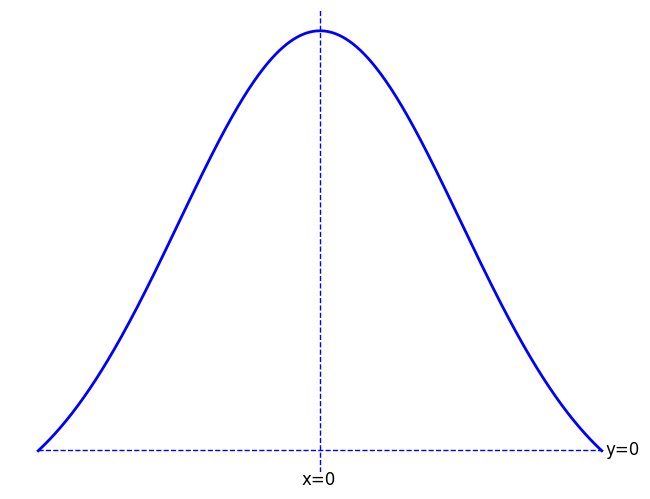

In [ ]:
# @title Crea distribución normal estándar { vertical-output: true }
def f(x):
    # Puedes definir tu propia función de densidad aquí
    # Por ejemplo, una distribución normal estándar
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Definir los límites del intervalo [a, b]
a = -2
b = 2

# Generar valores de x en el intervalo [a, b]
x_values = np.linspace(a, b, 1000)

# Calcular los valores de y = f(x)
y_values = f(x_values)

# Crear la gráfica
plt.figure(figsize=(8, 6))

# Graficar la función de densidad de probabilidad (PDF)
plt.plot(x_values, y_values, 'b-', linewidth=2)

# Líneas horizontal en y=0
plt.hlines(y=0.055, xmin=-2, xmax=2, color='blue', linestyle='--', linewidth=1)


# Líneas verticales en x=a y x=b
plt.axvline(x=0, color='blue', linestyle='--', linewidth=1)

# Eliminar los ticks de los ejes x e y
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

plt.text(2.15, 0.055, 'y=0', ha='center', va='center', color='black', fontsize=12)
plt.text(-0.01, 0.03, 'x=0', ha='center', va='center', color='black', fontsize=12)

# Mostrar la gráfica
plt.grid(True)
plt.axis('off')
plt.show()


<!-- ### Variables aleatorias continua:

Una v.a. continua 𝑋 cumple que para todo número 𝑘, la probabilidad de que 𝑋 lo tome es nula, esto es 𝑃(𝑋=𝑘)=0. La probabilidad que interesa es la de que tome valores en cualquier intervalo, esto es:
La probabilidad de (𝑎, 𝑏) es 𝑃(𝑎<𝑋<𝑏), que es la misma que la de [𝑎, 𝑏), (𝑎, 𝑏] o [𝑎, 𝑏].
La probabilidad de (𝑎,+∞) es 𝑃(𝑋>𝑎).
La probabilidad de (−∞, 𝑎) es 𝑃(𝑋<𝑎) -->

### Distribución normal:
Si $Z \thicksim N(0,1)$, dados dos valores $\mu$ y $\sigma (\sigma > 0)$ la v.a. $X = \mu + \sigma Z$  tiene la distribución normal $N(\mu,\sigma)$ de media $\mu$ y desviación típica $\sigma$. Se escribe $X \thicksim N(\mu,\sigma)$.

Su función de densidad es también una campana de Gauss, centrada en $x=\mu$ y simétrica respecto a esta recta. En $\mu-\sigma$ y $\mu+\sigma$ están los puntos de inflexión.


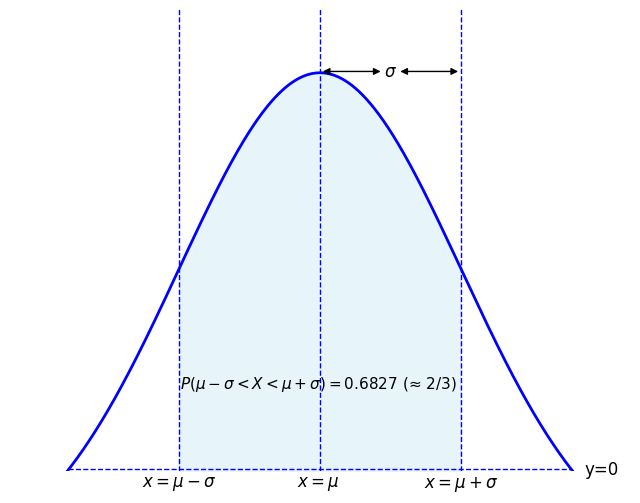

In [ ]:
# @title Crea distribución normal estándar { vertical-output: true }
def f(x):
    # Puedes definir tu propia función de densidad aquí
    # Por ejemplo, una distribución normal estándar
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Definir los límites del intervalo [a, b]
a = -2
b = 2

# Generar valores de x en el intervalo [a, b]
x_values = np.linspace(a, b, 1000)

# Calcular los valores de y = f(x)
y_values = f(x_values)

# Crear la gráfica
plt.figure(figsize=(8, 6))

# Graficar la función de densidad de probabilidad (PDF)
plt.plot(x_values, y_values, 'b-', linewidth=2)


# Rellenar el área bajo la curva entre x=a y x=b
plt.fill_between(x_values, 0, y_values, where=(x_values >= a+1) & (x_values <= b-1), color='skyblue', alpha=0.2)



# Líneas verticales en x=a y x=b
plt.axvline(x=0, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=-1, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=1, color='blue', linestyle='--', linewidth=1)

# Líneas horizontal en y=0
plt.hlines(y=0.082, xmin=-1.79, xmax=1.79, color='blue', linestyle='--', linewidth=1)


# Eliminar los ticks de los ejes x e y
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)


plt.annotate('', xy=(0, 0.4), xytext=(0.45, 0.4),
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))

plt.annotate('', xy=(0.55, 0.4), xytext=(1, 0.4),
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))
plt.text(0.5, 0.4, '$\sigma$', ha='center', va='center', color='black', fontsize=12)

plt.text(2, 0.082, 'y=0', ha='center', va='center', color='black', fontsize=12)
plt.text(-0.01, 0.07, f'$x=\mu$', ha='center', va='center', color='black', fontsize=12)
plt.text(-1, 0.07, f'$x=\mu-\sigma$', ha='center', va='center', color='black', fontsize=12)
plt.text(1, 0.07, f'$x=\mu+\sigma$', ha='center', va='center', color='black', fontsize=12)

plt.text(-0.01, 0.15, f'$P(\mu-\sigma<X<\mu+\sigma)= 0.6827$ (≈ 2/3)', ha='center', va='center', color='black', fontsize=11)

plt.ylim(0.08, 0.45)  # Ajustar el límite y


# Mostrar la gráfica
plt.grid(False)
plt.axis('off')
plt.show()


### Propiedades de la distribución normal:

Dada una v.a. $X$ (normal o no) de media $\mu$ y desviación típica $\sigma$ la probabilidad de que $X$ tome un valor que se aleje de su media una distancia inferior a $k$ veces su desviación típica se expresa:

$$P(|X-\mu|<k \sigma) = P(-k\sigma <X-\mu < k\sigma)=P(\mu-k\sigma<X<\mu+k\sigma)$$


Dada $ X \thicksim N(\mu, \sigma)$, destacamos las siguientes probabilidades:

* $P(\mu-\sigma<X<\mu+\sigma)= 0.6827$, por lo tanto, algo más de 2 de cada 3 veces el valor de una *distribución normal* no se aleja de la media más de 1 desviación típica $(2/3 = 0.6)$;

* $P(\mu -2\sigma < X < \mu+2\sigma)=0.9545$,  por lo tanto, algo más del 95% de las veces el valor de una distribución normal no se aleja de la media más de 2 desviaciones típicas;

* $P(\mu -3\sigma < X < \mu+3\sigma)=0.9973$, por lo tanto, es muy probable que el valor de una distribución normal no se aleje de la media más de 3 desviaciones típicas.

* Recíprocamente, si $X \thicksim N(\mu, \sigma)$ entonces su tipificada
$Z=(X-\mu)/\sigma$ cumple que $Z \thicksim N(0, 1)$. Esto es, al tipificar una distribución normal obtenemos la distribución normal estándar.

    La distribución normal aparece con frecuencia en amplios campos de la investigación. Es una d.p. muy interesante ya que, hablando informalmente, si el resultado de la variable a estudiar viene dado por la suma de un gran número de variables idénticas e independientes (que seguramente no sabremos medir) es de esperar que la d.p. resultante sea muy aproximadamente normal.



### Distribución $t$ de student:

La $t$ de Student con $n$ grados de libertad $n=(1,2,3,...)$ es una distribución continua. Si una v.a. $T$ sigue una distribución $t$ de Student con $n$ grados de libertad, se escribe $T \thicksim t_{n}$.

Como $N(0,1)$, $t_{n}$ está centrada en 𝑥$x=0$ y es simétrica con respecto a esta recta.
Se tiene $$t_{n} \xrightarrow[N \rightarrow +\infty]{} N(0,1)$$.

Es una d.p. que se usa para hacer inferencia sobre la media. Dadas $X_{1}, X_{2}, ..., X_{n}$ variables aleatorias independientes con una misma distribución normal $N(\mu,\sigma)$, con media muestral $\bar{X}$ y cuasidesviación típica $S_{X}$, entonces:

$$\frac{\bar{X}-\mu}{S_{X}/\sqrt{n}}\thicksim t_{n-1}$$

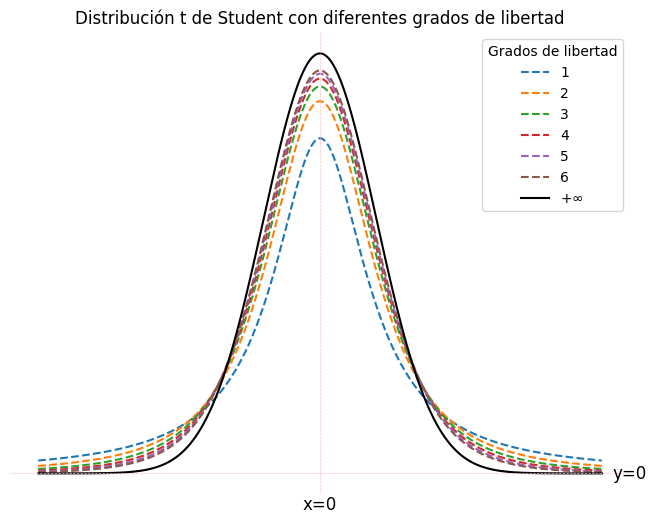

In [ ]:
# @title Crea distribución t de student
# import numpy as np
# import matplotlib.pyplot as plt
from scipy.stats import t

# Definir el rango para x
x = np.linspace(-5, 5, 1000)

# Grados de libertad para las distribuciones t de Student
grados_de_libertad = [1, 2, 3, 4, 5,6,7]  # Añadí 1000 como infinito

# Crear una nueva figura
plt.figure(figsize=(8, 6))

# Graficar las distribuciones t de Student para diferentes grados de libertad
for df in grados_de_libertad[:-1]:
    plt.plot(x, t.pdf(x, df), label=f'{df}', linestyle="--")
plt.plot(x, t.pdf(x, 10000000000), label=f'$+\infty$', linestyle="-", color="black")

# Agregar texto en x=0 que muestra la media
plt.text(0, -0.03, 'x=0', ha='center', va='center', color='black', fontsize=12)

# Agregar texto en x=0 que muestra la media
plt.text(5.5, 0, 'y=0', ha='center', va='center', color='black', fontsize=12)

# Eliminar los ticks de los ejes x e y
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Líneas verticales en x=a y x=b
plt.axvline(x=0, color='pink', linestyle='--', linewidth=0.5)

# Líneas verticales en x=a y x=b
plt.axhline(y=0, color='pink', linestyle='--', linewidth=0.5)

# Añadir título y leyenda
plt.title('Distribución t de Student con diferentes grados de libertad')
plt.legend(title="Grados de libertad")

# Mostrar la gráfica
plt.grid(False)
plt.axis('off')

plt.show()


### ¿Cómo utilizar las tablas de distribuciones?

**Tabla de la distribución normal estándar $N(0,1)$**

En la tabla $N(0,1)$ se indican, para $z \in \{0.00, 0.001, 0.002, ..., 2.99, 3.0, 3.1, ..., 7.9\}$, las probabilidades $P(Z>z)$, esto es la probabilidad de que una v.a. $Z \thicksim N(0,1)$ tome un valor mayor que $z$.


<!-- *Nota:* Para los valores $z$ comprendidos entre $0$ y $2.99$ la fila nos indica el primer decimal y la columna el segundo decimal. Para los valores $z$ comprendidos entre $3$ y $7.9$ la  fila nos indica la unidad y la columna el primer decimal. -->


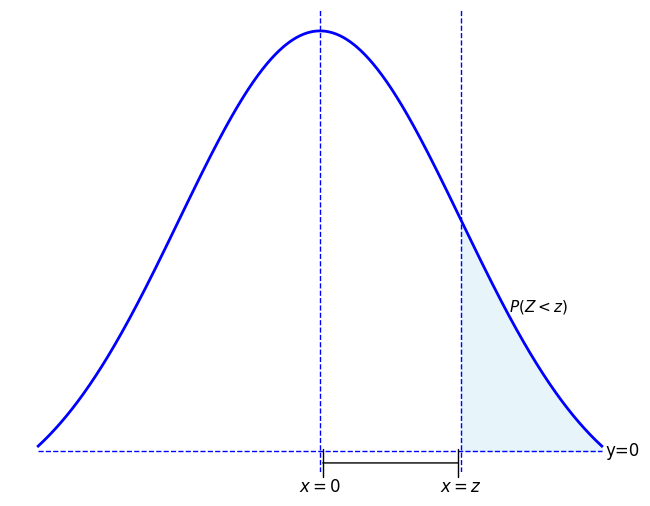

In [ ]:
# @title Información de una tabla de la distribución normal estándar { vertical-output: true }
def f(x):
    # Puedes definir tu propia función de densidad aquí
    # Por ejemplo, una distribución normal estándar
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

# Definir los límites del intervalo [a, b]
a = -2
b = 2

# Generar valores de x en el intervalo [a, b]
x_values = np.linspace(a, b, 1000)

# Calcular los valores de y = f(x)
y_values = f(x_values)

# Crear la gráfica
plt.figure(figsize=(8, 6))

# Graficar la función de densidad de probabilidad (PDF)
plt.plot(x_values, y_values, 'b-', linewidth=2)


# Rellenar el área bajo la curva
plt.fill_between(x_values, 0.05, y_values, where=(x_values >= 1) & (x_values <= 2), color='skyblue', alpha=0.2)



# # Líneas verticales en x=a y x=b
plt.axvline(x=0, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=1, color='blue', linestyle='--', linewidth=1)

# Líneas horizontal en y=0
plt.hlines(y=0.05, xmin=-2, xmax=2, color='blue', linestyle='--', linewidth=1)


# # Eliminar los ticks de los ejes x e y
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)


plt.annotate('', xy=(0, 0.04), xytext=(1, 0.04),
             arrowprops=dict(facecolor='black', arrowstyle='|-|'))


plt.text(0, 0.02, f'$x=0$', ha='center', va='center', color='black', fontsize=12)

plt.text(2.15, 0.05, 'y=0', ha='center', va='center', color='black', fontsize=12)

plt.text(1, 0.02, f'$x=z$', ha='center', va='center', color='black', fontsize=12)

plt.text(1.55, 0.17, f'$P(Z<z)$', ha='center', va='center', color='black', fontsize=11)

# # Mostrar la gráfica
plt.grid(False)
plt.axis('off')
plt.show()


[Tablas de distribuciones](https://estadistica-dma.ulpgc.es/estadFCM/pdf/distribuciones.pdf)

En la tabla $t_{n}$ se ubican los valores críticos $t_{n;p}$ (también puede usarse la notación $t(n;p)$), con

$n \in \{1, 2, 3, ..., 40, 45, 46, ..., 100, 125, +\infty \}$

$p \in \{0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45 \}$

de manera que para $T \thicksim t_{n}$ se tiene que


In [ ]:
#incluir aquí el gráfico

### Cálculo de probabilidades y abscisas

A la hora de calcular probabilidades y de obtener abscisas usando las tablas de probabilidad de la normal estándar y de la $t$ de Student debemos tener en cuenta que son simétricas con respecto a $x=0$, esto es,
$$P(V < v)=P(V < -v)$$
y
$$P(V > 0)=0.5$$

siendo $V$ una v.a. con d.p.$N(0,1)$ o $t_{n}$.

Una propiedad común para cualquier v.a. cntinua $X$ es:

$$P(X < x ) = P(X \leq x) = P([ X > x]^{c}) = 1- P(X > x)$$

**Ejercicio (I):** Data $Z \thicksim N(0,1)$, calcular:

*   Las probabilidades:
    * $P(Z > 2.3 )$
    * $P(Z < -2.3)$
    * $P(-2.3 < Z < 1.41)$

* Los valores de $x$ tales que:
    * $P(Z > x ) = 0.025$
    * $P(Z > x ) = 0.05$
        
**Ejercicio (II):**

*   Dada $T \thicksim t_{5}$, calcular:
    * $P(T > 1.1558)$
    * $P(T < x) = 0.95$




In [ ]:
# Las probabilidades
# P(Z > 2.3)
prob_z_gt_2_3 = 1 - norm.cdf(2.3)
print("P(Z > 2.3):", prob_z_gt_2_3)

# P(Z < -2.3)
prob_z_lt_minus_2_3 = norm.cdf(-2.3)
print("P(Z < -2.3):", prob_z_lt_minus_2_3)

# P(-2.3 < Z < 1.41)
prob_z_between_minus_2_3_and_1_41 = norm.cdf(1.41) - norm.cdf(-2.3)
print("P(-2.3 < Z < 1.41):", prob_z_between_minus_2_3_and_1_41)

# Los valores de x
# P(Z > x) = 0.025
x_025 = norm.ppf(1 - 0.025)
print("Valor de x tal que P(Z > x) = 0.025:", x_025)

# P(Z > x) = 0.05
x_05 = norm.ppf(1 - 0.05)
print("Valor de x tal que P(Z > x) = 0.05:", x_05)


P(Z > 2.3): 0.010724110021675837
P(Z < -2.3): 0.010724110021675809
P(-2.3 < Z < 1.41): 0.9100060485249318
Valor de x tal que P(Z > x) = 0.025: 1.959963984540054
Valor de x tal que P(Z > x) = 0.05: 1.6448536269514722


***
***

# Inferencia

<center>
<img src="https://github.com/ednavivianasegura/Curso_PLN/blob/main/ingerencia.png?raw=1" alt="inferencia" width="50%" height="50%">  
</center>

Para estudiar algún aspecto de la distribución de una variable $X$, tomamos una muestra de $n$ valores independientes de $X: x_{1}, x_{2}, ... , x_{n}$. En ***Estadística Inferencial*** se estudia qué afirmaciones podemos hacer sobre los aspectos que nos interesan de $X$, y con qué fiabilidad, en base a los valores de la muestra. La muestra puede consistir, por ejemplo, en los datos de $n$ personas encuestadas o los resultados de $n$ mediciones experimentales.

Abordaremos dos aspectos:

* **La media:** por ejemplo, ¿podemos afirmar que la palabra "tecnología" aparece en promedio 10 veces en los artículos de tecnología?
* **La proporción:** por ejemplo, ¿podemos afirmar que la un tercio de los documentos relacionados con la política mencionan al partido que se encuentra actualmente en el poder?

## Inferencia sobre la media

Sabemos (o suponemos) que la población $X$ es normal, $X \thicksim N(\mu, \sigma)$. El valor $\mu$ es la media poblacional, y nos restringiremos a afirmaciones sobre $\mu$. A $\sigma$ se le llama desviación típica poblacional.

Como condiciones de validez, deben cumplirse que los casos $X_{i}$ sean independientes (el valor de cada uno no tiene influencia en los demás) y para cada $i$𝑖, $X_{i} \thicksim N(\mu, \sigma)$.

La **media muestral** es
$$ \bar{X}= \frac{1}{n} \sum_{i=1}^{n}X_{i}, $$
y la **cuasidesviación típica muestral** es

$$S_{X}=\sqrt{\frac{1}{(n-1)}\sum_{i=1}^{n}(X_{i}-\bar{X})^{2}}$$

La base de nuestra inferencia es que, como indicamos al tratar la distribución normal y la distribucín $t$ de student,

$$\frac{\bar{X}-\mu}{S_{X}/\sqrt{n}}\thicksim t_{n-1}$$

Obviamente $\frac{\bar{X}-\mu}{S_{X}/\sqrt{n}}$ es una variable aleatoria, su valor depende de nuestra muestra

## Inferencia sobre la proporción

Estudiamos una característica. La probabilidad de que un caso aleatoriamente elegido la cumpla es $p$, la proporción poblacional. En una muestra de $n$ individuos (casos) la cumplen $k$, y $\hat{p}=\frac{k}{n}$ es la **proporción muestral**. La base de nuestra inferencia es que, si $n$ es grande,


$$\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}} \underset{\text{aprox}}{\sim} N(0,1) $$

Además se deben cumplir las siguientes condiciones de validez:

* La muestra es ***independiente y representativa*** (en los casos elegidos esperamos que la probabilidad de cumplir la característica sea efectivamente la proporción muestral).

* O bien $n \geq 30$; o bien $np \geq 5$ y $n(1-p)\geq 5$.

  Esto significa que la aproximación es mala cuando $p \approx 0$ o $p \approx 1$. Como no conocemos $p$ esta condición la sustituimos por $n \hat{p} = k \geq 5 $ y $n(1-\hat{p})=n-k \geq 5.$

### Resultados de inferencia

Nos centramos en tres tipos de inferencia, que realizaremos para la media y para la proporción:
* intervalos de confianza
* contrastes de hipótesis
* tamaño de la muestra

Estos resultados dependerán de la fiabilidad establecida, que se expresa mediante el nivel de confianza como $1-\alpha$ donde $\alpha$ (que suele representar una probabilidad pequeña) es el nivel de significación.

Habitualmente:
* $\alpha = 0.1 $, por lo tanto $1-\alpha = 0.9$, lo que indica que se tiene el $90\%$ de confianza.

* $\alpha = 0.05$, por lo tanto $1-\alpha = 0.95$, lo que indica que se tiene el $95\%$ de confianza.

* $\alpha = 0.01$, por lo tanto $1-\alpha = 0.99$, lo que indica que se tiene el $99\%$ de confianza.



## Intervalos de confianza

### Intervalo de confianza para la media

Para obtener el intervalo de confianza para la media de una población normal con nivel de confianza $1-\alpha$ usamos que

$$\frac{\bar{X}-\mu}{S_{X}/\sqrt{n}}\thicksim t_{n-1}$$


$$1- \alpha = P\Big( -t_{n-1;\alpha/2} < \frac{\bar{X}-\mu}{S_{X}/\sqrt{n}}\thicksim t_{n-1} < t_{n-1;\alpha/2}\Big)$$

despejamos $\mu$ y llamamos como error muestral a

$$EM= t_{n-1;\alpha/2}S_{X}/\sqrt{n}$$

Entonces:

\begin{align*}
1-\alpha &= P(-EM < \bar{X} - \mu < \bar{X} + EM) \\
&= P(\bar{X} -EM < \mu < \bar{X} + EM) \\
&= P(\mu \in (\bar{X} -EM,\bar{X} +EM))
\end{align*}

El valor $1-\alpha$ representa la probabilidad de que el intervalo dado (en la formula) contenga el verdadero valor del parámetro $\mu$.

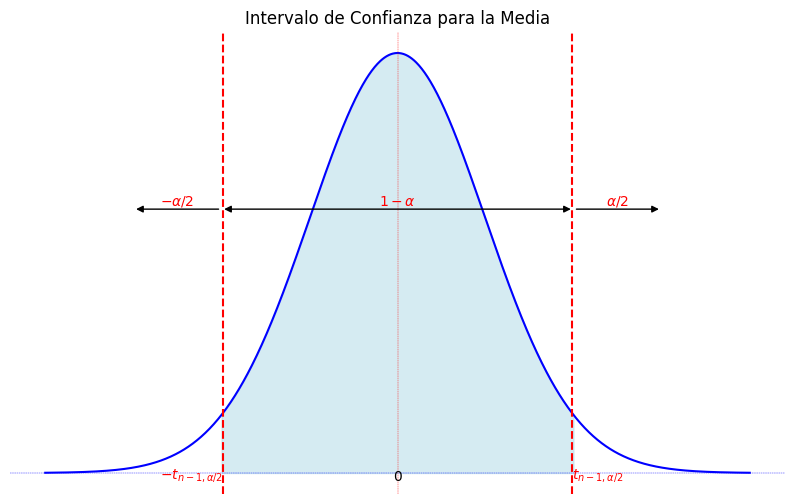

In [ ]:
# @title Crea grafico intervalo para la media
# Parámetros
n = 100  # Tamaño de la muestra
alpha = 0.05  # Nivel de confianza

# Cálculo de los valores críticos de la distribución t de Student
t_left = -t.ppf(1 - alpha / 2, n - 1)
t_right = t.ppf(1 - alpha / 2, n - 1)

# Definir el rango para la gráfica
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, n - 1)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
# Rellenar el área bajo la curva
plt.fill_between(x, y, where=(x >= -2) & (x <= 2), color='lightblue', alpha=0.5)

# Líneas verticales y etiquetas
plt.axvline(0, color='red', linestyle='--', linewidth=0.3)

plt.axhline(0, color='blue', linestyle='--', linewidth=0.3)

plt.axvline(t_left, color='red', linestyle='--')
plt.text(t_left, -0.01, r'$-t_{n-1,\alpha/2}$', ha='right', va='bottom', color='red')
plt.axvline(t_right, color='red', linestyle='--')
plt.text(t_right, -0.01, r'$t_{n-1,\alpha/2}$', ha='left', va='bottom', color='red')

plt.text(0, -0.01, '0', ha='center', va='bottom', color='black')
plt.text(0, 0.25, r'$1-\alpha$', ha='center', va='bottom', color='red')

plt.text(-2.5, 0.25, r'$-\alpha/2$', ha='center', va='bottom', color='red')

plt.text(2.5, 0.25, r'$\alpha/2$', ha='center', va='bottom', color='red')

plt.annotate('', xy=(-2, 0.25), xytext=(2, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))


plt.annotate('', xy=(-2, 0.25), xytext=(-3, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='<|-'))

plt.annotate('', xy=(3, 0.25), xytext=(2, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='-|>'))

plt.title('Intervalo de Confianza para la Media')
plt.grid(True)
plt.axis('off')
# Mostrar la gráfica
plt.show()


Por lo tanto, el intervalo de confianza para media poblacional $\mu$ con una fiabilidad de $(1-\alpha)\times 100 \%$ es:

$$IC_{1-\alpha} (\mu) = \Big(\bar{X}-t_{n-1\;\alpha/2}\frac{S_{X}}{\sqrt{n}},\bar{X}+t_{n-1\;\alpha/2}\frac{S_{X}}{\sqrt{n}}\Big)=\Big( \bar{X} \pm t_{n-1\;\alpha/2}\frac{S_{X}}{\sqrt{n}}\Big)$$

El error muestral es lo que la media poblacional $\mu$ puede distanciarse de la media muestral $\bar{X}$ con el nivel de confianza establecido. En la expresión $EM=t_{n-1;\alpha/2}\frac{S_{X}}{\sqrt{n}}$ tenemos que:

* A menor $S_{X}$, menor $EM$. Esto significa que si la muestra es poco dispersa (presenta pocas variaciones), entonces es más probable que $\bar{X}$ se acerque a $\mu$.

* A mayor tamaño de la muestra $n$, menor $EM$. Obviamente, si el denominador es mayor, el $EM$ será menor. Esto significa que una muestra muy numerosa nos da más información sobre la población.

* A menor $\alpha$, mayor $EM$. Con un intervalo más amplio tendremos más garantías de *acertar*, lo que se consigue con un mayor nivel de confianza $1-\alpha$.


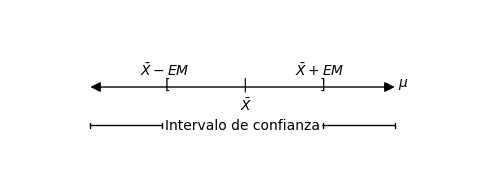

In [ ]:
# @title Crea figura intervalo de confianza para la media
plt.figure(figsize=(6,2))

plt.annotate('', xy=(-2, 0), xytext=(2, 0),size=15,
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))


plt.annotate('[', xy=(-1, -0.01), xytext=(-1, -0.02))
plt.annotate(']', xy=(1, -0.01), xytext=(1, -0.02))

plt.annotate(r'$\mu$', xy=(2, 0), xytext=(2, 0))

plt.annotate('|', xy=(0, -0.01), xytext=(0, -0.02))

plt.text(0.05, -0.35, r'$\bar{X}$', ha='center', va='bottom', color='black')

plt.text(-1, 0.1, r'$\bar{X}-EM$', ha='center', va='bottom', color='black')
plt.text(1, 0.1, r'$\bar{X}+EM$', ha='center', va='bottom', color='black')


plt.annotate('', xy=(-1, -0.5), xytext=(-2, -0.5),size=2,
             arrowprops=dict(facecolor='black', arrowstyle='|-|'))


plt.annotate('', xy=(1, -0.5), xytext=(2, -0.5),size=2,
             arrowprops=dict(facecolor='black', arrowstyle='|-|'))

plt.text(0, -0.6, 'Intervalo de confianza', ha='center', va='bottom', color='black')

# Establece los límites del gráfico
plt.xlim(-3, 3)
plt.ylim(-1, 1)

# Muestra el gráfico
plt.axis('off')
plt.grid(True)
plt.show()


### Intervalo de confianza para la proporción

Para obtener el intervalo de confianza para la proporción $p$ con nivel de confianza $1-\alpha$ usamos que, si se dan las condiciones de validez, se tiene

$$\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}\thicksim N(0,1)$$


Por lo tanto,

$$1-\alpha=P\Big(-z_{\alpha/2} < \frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}} < z_{\alpha/2}\Big)$$

Se despeja $p$. Para simplificar, si $n$ es grande ($n\geq30$), suponemos que $\hat{p}\approx p$, de manera que la probabilidad anterior sea prácticamente igual si sustituimos en el denominador $p(1-p)$ por $\hat{p}(1-\hat{p})$ y llamemos a $EM = z_{\alpha/2}\sqrt{\hat{p}(1-\hat{p}/n)}$ error muestral, es decir,

\begin{align*}
    1-\alpha&=P(-EM < \hat{p}-p < EM)\\
    &=P(\hat{p}-EM < p < \hat{p}+EM)\\
    &=P(p\in(\hat{p}-EM,\hat{p}+EM))    
\end{align*}

Por lo tanto el intervalo de confianza para la proporción  $p$ con una fiabilidad del $1-\alpha\times100\%$ es:


\begin{align*}
    IC_{1-\alpha}&=\Big(\hat{p}-z_{\alpha/2}\frac{\sqrt{\hat{p}(1-\hat{p}}}{\sqrt{n}},\hat{p}+z_{\alpha/2}\frac{\sqrt{\hat{p}(1-\hat{p}}}{\sqrt{n}}\Big)\\
    &=\Big( \hat{p} \pm z_{\alpha/2}\frac{\sqrt{\hat{p}(1-\hat{p}}}{\sqrt{n}} \Big)
\end{align*}




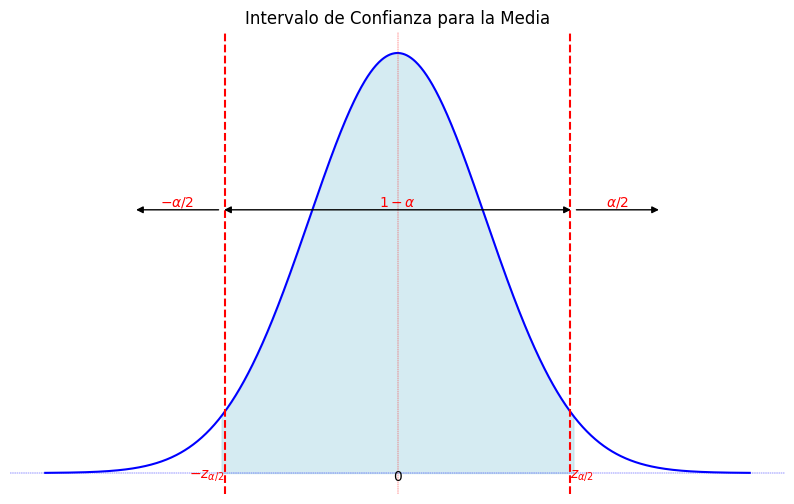

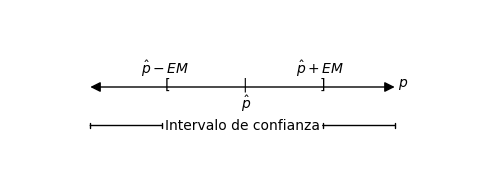

In [ ]:
# @title Crea graficos intervalo para la proporción
# Parámetros
n = 100  # Tamaño de la muestra
alpha = 0.05  # Nivel de confianza

# Cálculo de los valores críticos de la distribución normal estándar
z_left = -norm.ppf(1 - alpha / 2)
z_right = norm.ppf(1 - alpha / 2)

# Definir el rango para la gráfica
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
# Rellenar el área bajo la curva
plt.fill_between(x, y, where=(x >= -2) & (x <= 2), color='lightblue', alpha=0.5)

# Líneas verticales y etiquetas
plt.axvline(0, color='red', linestyle='--', linewidth=0.3)
plt.axhline(0, color='blue', linestyle='--', linewidth=0.3)

plt.axvline(z_left, color='red', linestyle='--')
plt.text(z_left, -0.01, r'$-z_{\alpha/2}$', ha='right', va='bottom', color='red')
plt.axvline(z_right, color='red', linestyle='--')
plt.text(z_right, -0.01, r'$z_{\alpha/2}$', ha='left', va='bottom', color='red')

plt.text(0, -0.01, '0', ha='center', va='bottom', color='black')
plt.text(0, 0.25, r'$1-\alpha$', ha='center', va='bottom', color='red')

plt.text(-2.5, 0.25, r'$-\alpha/2$', ha='center', va='bottom', color='red')
plt.text(2.5, 0.25, r'$\alpha/2$', ha='center', va='bottom', color='red')

plt.annotate('', xy=(-2, 0.25), xytext=(2, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))

plt.annotate('', xy=(-2, 0.25), xytext=(-3, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='<|-'))

plt.annotate('', xy=(3, 0.25), xytext=(2, 0.25),
             arrowprops=dict(facecolor='black', arrowstyle='-|>'))

plt.title('Intervalo de Confianza para la Media')
plt.grid(True)
plt.axis('off')
# Mostrar la gráfica
plt.show()


################################################
################################################
################################################
################################################
plt.figure(figsize=(6,2))

plt.annotate('', xy=(-2, 0), xytext=(2, 0),size=15,
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))


plt.annotate('[', xy=(-1, -0.01), xytext=(-1, -0.02))
plt.annotate(']', xy=(1, -0.01), xytext=(1, -0.02))

plt.annotate(r'$p$', xy=(2, 0), xytext=(2, 0))

plt.annotate('|', xy=(0, -0.01), xytext=(0, -0.02))

plt.text(0.05, -0.35, r'$\hat{p}$', ha='center', va='bottom', color='black')

plt.text(-1, 0.1, r'$\hat{p}-EM$', ha='center', va='bottom', color='black')
plt.text(1, 0.1, r'$\hat{p}+EM$', ha='center', va='bottom', color='black')


plt.annotate('', xy=(-1, -0.5), xytext=(-2, -0.5),size=2,
             arrowprops=dict(facecolor='black', arrowstyle='|-|'))


plt.annotate('', xy=(1, -0.5), xytext=(2, -0.5),size=2,
             arrowprops=dict(facecolor='black', arrowstyle='|-|'))

plt.text(0, -0.6, 'Intervalo de confianza', ha='center', va='bottom', color='black')

# Establece los límites del gráfico
plt.xlim(-3, 3)
plt.ylim(-1, 1)

# Muestra el gráfico
plt.axis('off')
plt.grid(True)
plt.show()



## Contraste de hipótesis

Planteamos una afirmación sobre la variable que estudiamos, la **hipótesis nula** $H_{0}$. Para contrastarla tomamos una muestra $X_{1}, X_{2}, ..., X_{n}$ aleatoria e independiente.

Un contraste de hipótesis $H_{0}$ consiste en aplicar un **estadístico** $T(X_{1}, X_{2}, ..., X_{n})$ y determinar, para el **nivel de significación** $\alpha >0$ una **región de rechazo** $R(\alpha)$ tal que, si $H_{0}$ fuese cierta, la probabilidad de que $T(X_{1}, X_{2}, ..., X_{n})$ tome su valor en $R(\alpha)$ para una muestra aleatoria sería tan pequeña como $\alpha$. En tal caso, $T(X_{1}, X_{2}, ..., X_{n}) \in R(\alpha)$, rechazamos $H_{0}$ y nos quedamos con su opuesta, la **hipótesis alternativa** $H_{1}$.

Si en cambio $T(X_{1}, X_{2}, ..., X_{n}) \notin R(\alpha)$, o sea $T(X_{1}, X_{2}, ..., X_{n}) \in R(\alpha)^{c}=RA(\alpha)$ (**la región de aceptación**), entonces aceptamos $H_{0}$ (o mejor dicho en rigor, no rechazamos $H_{0}$).

En caso de rechazo decimos que tenemos evidencia estadística suficiente para hacerlo (depende del nivel de significación) y en caso contrario no podemos rechazarla porque no tenemos esa evidencia. ***Pero tampoco la tenemos de que $H_{0}$ sea cierta, ¡el contraste no sirve para demostrar $H_{0}$!***


En muchos contrastes de hipótesis es posible calcular el p-valor, un valor dado por la muestra tal que si es menor que $\alpha$ entones se rechaza $H_{0}$.

Cuando el $p-valor$ es prácticamente nulo significa que nuestros datos contradicen muy claramente $H_{0}$. Esto es, tenemos evidencia estadística abrumadora en contra de $H_{0}$ y la rechazaremos con cualquier nivel de significación razonable.


### Contraste para la media

El contraste (bilateral) de la media en una población normal consiste en las hipótesis
$$H_{0}:  \mu = \mu_{}  \hspace{0.5cm} \text{frente a} \hspace{0.5cm} H_{1}:  \mu \neq \mu_{}$$
con una muestra de tamaño $n$, $X_{1}, X_{2}, ..., X_{n}$.


**Condiciones de validez:**

*   Para todo $i, X_{i} \thicksim N(\mu,\sigma)$ independientes.

    Aplicamos el estadístico:

    $$t_{obs}=\frac{\bar{X}-\mu_{0}}{S_{x}/\sqrt{n}}$$

*   Si $H_{0}$ es cierta se tiene que  $t_{obs} \thicksim t_{n-1}$
($t_{obs}$ es una variable aleatoria que retorna un valor para cada muestra de tamaño $n$).

    Por ello, tomamos para un nivel de significación $\alpha>0$, cuya región de rechazo es:

    $$R(\alpha)=(-\infty, -t_{(n-1;\alpha/2)}] \cup [t_{(n-1;\alpha/2)},+\infty )$$

    Por lo tanto, rechazamos $H_{0}$ si
    
    $$|t_{obs}| \geq t_{(n-1;\alpha/2)}$$

    O sea, aceptamos (no rechazamos) $H_{0}$ si
    
    $$|t_{obs}| < t_{(n-1;\alpha/2)}$$
    
    La región de aceptación (de no rechazo) vine dada por:

    $$RA(\alpha) = (-t_{(n-1;\alpha/2)},t_{(n-1;\alpha/2)})$$
    



---

A $t_{obs}$ se le denomina **valor observado** del contraste, y a $t_{(n-1;\alpha/2)}$ se le llama **valor crítico** del contraste.


***Observación:***

Otra forma de realizar el contraste:

\begin{align*}
    t_{obs} \in RA(\alpha) &\Leftrightarrow  -t_{(n-1;\alpha/2)} < \frac{\bar{X}-\mu_{0}}{S_{X}/\sqrt{n}} < t_{(n-1;\alpha/2)}\\
    &\Leftrightarrow \bar{X} - \mu_{0} < EM, \text{ donde  }  EM= t_{n-1;\alpha/2}S_{X}/\sqrt{n} \\
    &\Leftrightarrow \bar{X} -EM < \mu_{0} < \bar{X} +EM\\
    &\Leftrightarrow \mu_{0} \in IC_{1-\alpha}(\mu)
\end{align*}

Esto es, aceptamos $H_{0}$ si y sólo si la media a contrastar esta en el intervalo de confianza que nos proporciona la muestra, para el nivel de confianza $1-\alpha$.




<ipython-input-59-3943b8a12bb0>:55: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('', xy=(-2, 0.25), xytext=(-3, 0.25),
<ipython-input-59-3943b8a12bb0>:58: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('', xy=(3, 0.25), xytext=(2, 0.25),


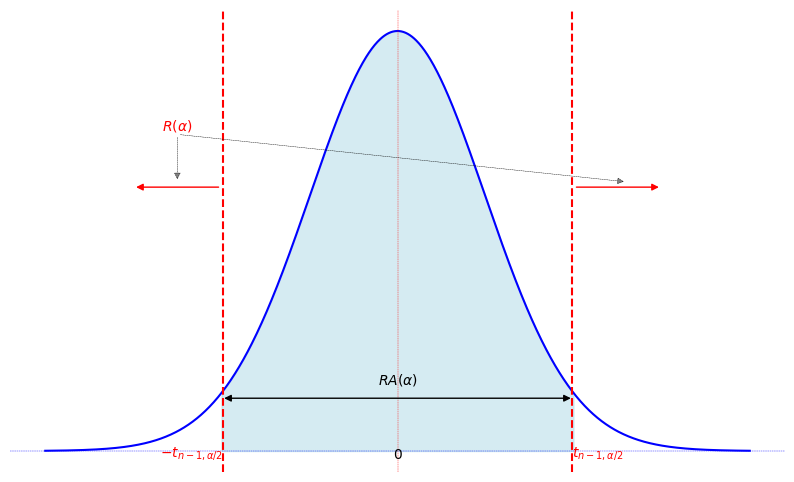

In [ ]:
# @title Crea gráfico zona de rechazo/aceptación para la media
# Parámetros
n = 100  # Tamaño de la muestra
alpha = 0.05  # Nivel de confianza

# Cálculo de los valores críticos de la distribución t de Student
t_left = -t.ppf(1 - alpha / 2, n - 1)
t_right = t.ppf(1 - alpha / 2, n - 1)

# Definir el rango para la gráfica
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, n - 1)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
# Rellenar el área bajo la curva
plt.fill_between(x, y, where=(x >= -2) & (x <= 2), color='lightblue', alpha=0.5)

# Líneas verticales y etiquetas
plt.axvline(0, color='red', linestyle='--', linewidth=0.3)

plt.axhline(0, color='blue', linestyle='--', linewidth=0.3)

plt.axvline(t_left, color='red', linestyle='--')
plt.text(t_left, -0.01, r'$-t_{n-1,\alpha/2}$', ha='right', va='bottom', color='red')
plt.axvline(t_right, color='red', linestyle='--')
plt.text(t_right, -0.01, r'$t_{n-1,\alpha/2}$', ha='left', va='bottom', color='red')

plt.text(0, -0.01, '0', ha='center', va='bottom', color='black')


plt.text(-2.5, 0.3, r'$R(\alpha)$', ha='center', va='bottom', color='red')


plt.text(0, 0.06, r'$RA(\alpha)$', ha='center', va='bottom', color='black')


plt.annotate('', xy=(-2, 0.05), xytext=(2, 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))




plt.annotate('', xy=(-2.5, 0.30), xytext=(2.6, 0.255),
             arrowprops=dict(facecolor='grey', arrowstyle='<|-',linestyle='dashed', linewidth=0.3))



plt.annotate('', xy=(-2.5, 0.30), xytext=(-2.5, 0.255),
             arrowprops=dict(facecolor='grey', arrowstyle='<|-',linestyle='dashed', linewidth=0.3))



plt.annotate('', xy=(-2, 0.25), xytext=(-3, 0.25),
             arrowprops=dict(facecolor='red', arrowstyle='<|-',color='red'))

plt.annotate('', xy=(3, 0.25), xytext=(2, 0.25),
             arrowprops=dict(facecolor='red', arrowstyle='-|>',color='red'))

plt.axis('off')
# Mostrar la gráfica
plt.show()

El $p-valor$ para este contraste mide la probabilidad de que el estadístico $t_{obs}$ se aleje de $0$ al menos una cantidad $|t_{obs}|$, esto es, dado $T \thicksim t_{n-1}$


$$p-valor = P(|T| > |t_{obs}|) = 2P(T > |t_{obs}|)$$



\begin{align*}
    \text{Rechazamos} H_{0} & \Leftrightarrow p-valor = 2P(T > |t_{obs}|) \leq \alpha\\
    & \Leftrightarrow P(T > |t_{obs}| )\leq \frac{\alpha}{2}\\
    & \Leftrightarrow t_{n-1;\alpha/2} \leq |t_{obs}|
\end{align*}

### Contraste para la proporción

En el contraste (bilateral) de la proporción se contrasta $p_{0}$ como valor de la proporción $p$, esto es:

\begin{cases}
    H_{0}: p= p_{0}\\
    H_{1}: p \neq p_{0}
\end{cases}

***Condiciones de validez:***

*   La muestra es independiente y representativa de la población
*   $n \geq 0$, o bien
    \begin{cases}
        n\hat{p} = k \geq 5\\
        n(1-\hat{p}=n-k \geq 5)
    \end{cases}

El **valor observado** de contraste es el estadístico $$Z_{obs}= \frac{\hat{p}-p_{0}}{\sqrt{\frac{p_{0}(1-p_{0})}{n}}}$$

Si $H_{0}$ es cierta se tiene que $Z_{obs}$ se distribucye aproximadamente como una normal estándar.
Con esto, y fijando un nivel de significancia $\alpha$, si ocurre $Z_{obs}\geq Z_{\alpha/2}$ o $Z_{obs}\leq -Z_{\alpha/2}$, entonces rechazamos $H_{0}$ (lo que implica quee no se considera fiabl que $p=p_{0}$, porque en tal caso sería muy extraño que la muestra fuera así).


La muestra está en la **región de rechazo** $R(\alpha) \Leftrightarrow |Z_{obs}| \geq Z_{\alpha/2}$.

La muestra está en la **región de aceptación**  $RA(\alpha) \Leftrightarrow Z_{obs} \in (-Z_{\alpha/2},Z_{\alpha/2})$.

Sea $Z \thicksim N(0,1)$,




\begin{align*}
    \text{Rechazamos } H_{0} & \Leftrightarrow p-valor = P(|Z| > |Z_{obs}| )=2P(Z > |Z_{obs}|) \leq \alpha\\
    & \Leftrightarrow P(Z > |Z_{obs}| )\leq \frac{\alpha}{2}\\
    & \Leftrightarrow Z_{\alpha/2} \leq |Z_{obs}|
\end{align*}


<ipython-input-60-02f51b890c18>:56: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('', xy=(-2, 0.25), xytext=(-3, 0.25),
<ipython-input-60-02f51b890c18>:59: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.annotate('', xy=(3, 0.25), xytext=(2, 0.25),


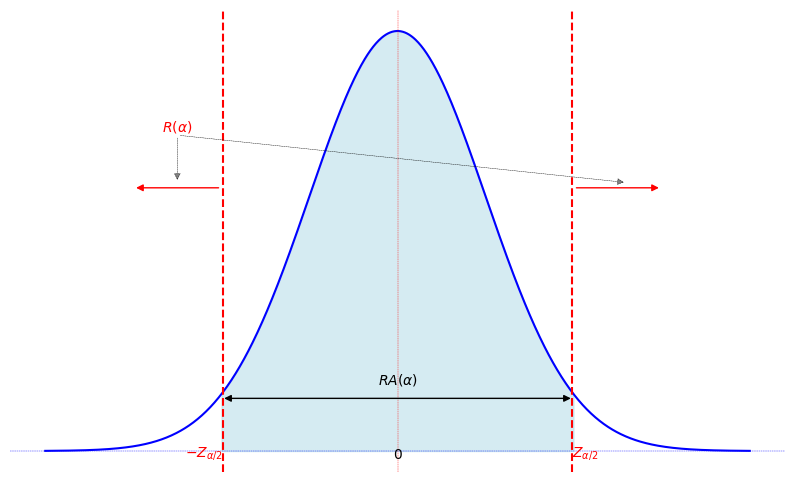

In [ ]:
# @title Crea gráfico zona de rechazo/aceptación para la proporción
# Parámetros
# Parámetros
n = 100  # Tamaño de la muestra
alpha = 0.05  # Nivel de confianza

# Cálculo de los valores críticos de la distribución normal estándar
z_left = -norm.ppf(1 - alpha / 2)
z_right = norm.ppf(1 - alpha / 2)

# Definir el rango para la gráfica
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-')
# Rellenar el área bajo la curva
plt.fill_between(x, y, where=(x >= -2) & (x <= 2), color='lightblue', alpha=0.5)

# Líneas verticales y etiquetas
plt.axvline(0, color='red', linestyle='--', linewidth=0.3)

plt.axhline(0, color='blue', linestyle='--', linewidth=0.3)

plt.axvline(t_left, color='red', linestyle='--')
plt.text(t_left, -0.01, r'$-Z_{\alpha/2}$', ha='right', va='bottom', color='red')
plt.axvline(t_right, color='red', linestyle='--')
plt.text(t_right, -0.01, r'$Z_{\alpha/2}$', ha='left', va='bottom', color='red')

plt.text(0, -0.01, '0', ha='center', va='bottom', color='black')


plt.text(-2.5, 0.3, r'$R(\alpha)$', ha='center', va='bottom', color='red')


plt.text(0, 0.06, r'$RA(\alpha)$', ha='center', va='bottom', color='black')


plt.annotate('', xy=(-2, 0.05), xytext=(2, 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='<|-|>'))




plt.annotate('', xy=(-2.5, 0.30), xytext=(2.6, 0.255),
             arrowprops=dict(facecolor='grey', arrowstyle='<|-',linestyle='dashed', linewidth=0.3))



plt.annotate('', xy=(-2.5, 0.30), xytext=(-2.5, 0.255),
             arrowprops=dict(facecolor='grey', arrowstyle='<|-',linestyle='dashed', linewidth=0.3))



plt.annotate('', xy=(-2, 0.25), xytext=(-3, 0.25),
             arrowprops=dict(facecolor='red', arrowstyle='<|-',color='red'))

plt.annotate('', xy=(3, 0.25), xytext=(2, 0.25),
             arrowprops=dict(facecolor='red', arrowstyle='-|>',color='red'))

plt.axis('off')
# Mostrar la gráfica
plt.show()

## Consideraciones sobre la muestra:



*   **Obtención**: Debe ser independiente (los valores de cada caso no deben tener influencia en los demás) y también representativa (se necesita, para que la inferencia sea justificada, esperar que los valores de la muestra se asemejen en principio a los que se dan en toda la población).

*   **Tamaño de la muestra**: Cuando calculamos un intervalo de confianza el grado de imprecisión lo da el error muestral. Obviamente, es menor cuanto mayor es el tamaño de la muestra, pero puede ser impracticable (o tal vez carísimo) conseguir que el tamaño sea muy grande. Lo que se hace es calcular el tamaño que necesitaríamos para no rebasar un error muestral objetivo, y luego decidir en consecuencia.






### Tamaño de la muestra para la media

En la inferencia sobre la media de una población normal vimos que el error muestral se calcula
$$EM= t_{n-1;\alpha/2}\frac{S_{X}}{n}$$

Llamamos $EM_{obj}$ a nuestro objetivo y necesitamos que

$$t_{n-1;\alpha/2}\frac{S_{X}}{\sqrt{n}} \leq EM_{obj}$$

Para poder *despejar* $n$ sustituimos $t_{n-1;\alpha/2}$ por $Z_{\alpha/2}$.
Obviamente no tenemos $S_{X}$, por lo que tomamos $S$, ya sea la *cuasivarianza* típica de una muestra previa o alguna otra estimación fiable de la desviación típica poblacional.

Buscamos entonces:

$$Z_{\alpha/2}\frac{S}{\sqrt{n}} \leq EM_{obj} \Leftrightarrow Z_{\alpha/2}\frac{S}{EM_{obj}} \leq \sqrt{n} \Leftrightarrow n \geq Z_{\alpha/2}^{2}\frac{S^{2}}{EM_{obj}^{2}}$$



### Tamaño de la muestra para la proporción

Vimos qu el error muestral para $IC_{1-\alpha}(p)$ es:

$$EM = z_{\alpha/2}\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$

Nos planteamos dos situaciones:

*   Hemos obtenido ya $\hat{p}$ con una muestra y queremos calcular $n$ para conseguir un valor $EM_{obj}$ *(error muestral objetivo)* con la misma $\hat{p}$.

    Por lo tanto tenemos:

    
$$Z_{\alpha/2}\frac{\sqrt{\hat{p}(1-\hat{p})}}{\sqrt{n}} \leq EM_{obj} \Leftrightarrow Z_{\alpha/2}\frac{\sqrt{\hat{p}(1-\hat{p})}}{EM_{obj}} \leq \sqrt{n} \Leftrightarrow n \geq Z_{\alpha/2}^{2}\frac{\hat{p}(1-\hat{p})}{EM_{obj}^{2}}$$

*   Queremos conseguir un valor $EM_{obj}$ independientemente de qué $\hat{p}$ obtengamos.
Entonces, cambiamos $\hat{p}(1-\hat{p})$ por su máximo valor posible en $\hat{p} \in (0,1)$, que es cuando $\hat{p}=1/2$, en cuyo caso, $\hat{p}(1-\hat{p})=1/4$.
Tomamos entonces

$$n \geq Z_{\alpha/2}^{2} \frac{1}{4EM^{2}_{obj}}$$


***NOTA:***

En ambas situaciones, como nos basamos en la aproximación a la distribución normal estándar de $$\frac{\hat{p}-p}{\sqrt{\frac{p(1-p)}{n}}}$$ para dar por bueno lo anterior, necesitamos obtener $n \geq 30$.





## RESUMEN:

| Sobre la media                                                                 | Sobre la proporción                                                      |
|--------------------------------------------------------------------------------|---------------------------------------------------------------------------|
| - Intervalo de Confianza:                                                      | - Intervalo de confianza:                                                |
|                                                                                  |                                                                           |
| $$\Big( \bar{X} \pm t_{n-1\;\alpha/2}\frac{S_{X}}{\sqrt{n}}\Big)$$             | $$\Big( \hat{p} \pm z_{\alpha/2}\frac{\sqrt{\hat{p}(1-\hat{p})}}{\sqrt{n}} \Big)$$ |
|                                                                                  |                                                                           |
| - Contraste de hipótesis:                                                       | - Contraste de hipótesis:                                                |
|                                                                                  |                                                                           |
| $$t_{obs}=\frac{\bar{X}-\mu_{0}}{S_{x}/\sqrt{n}},$$                            | $$Z_{obs}= \frac{\hat{p}-p_{0}}{\sqrt{\frac{p_{0}(1-p_{0})}{n}}},$$        |
| $$RA(\alpha) = (\pm t_{(n-1;\alpha/2)}),$$                                      | $$RA(\alpha) = (\pm Z_{\alpha/2}),$$                                      |
| $$p-valor = 2P(T > |t_{obs}|) \text{ con } T \thicksim t_{n-1}$$                | $$p-valor = 2P(Z > |Z_{obs}|) \text{ con } Z \thicksim N(0,1)$$           |
|                                                                                  |                                                                           |
| - Tamaño de la muestra:                                                         | - Tamaño de la muestra:                                                   |
|                                                                                  |                                                                           |
| $$n \geq Z_{\alpha/2}^{2} \frac{S^{2}}{EM^{2}_{obj}}$$                         | - Con información muestral:                                              |
|                                                                                  |                                                                           |
|                                                                                  | $$n \geq Z_{\alpha/2}^{2}\frac{\hat{p}(1-\hat{p})}{EM_{obj}^{2}}$$        |
|                                                                                  |                                                                           |
|                                                                                  | - Sin información adicional:                                              |
|                                                                                  |                                                                           |
|                                                                                  | $$n \geq Z_{\alpha/2}^{2} \frac{1}{4EM^{2}_{obj}}$$                       |




***
***


# Estadística Multivariante

Estudiamos los datos, en $N$ casos, en primer lugar, de ***dos*** variables $X$ e $Y$. Queremos analizar la relación entre ellas y medir el grado de asociación detectada. En este contexto, la distribución marginal de $X$ es la de dicha variable por sí sola, sin tener en cuenta los valores de $Y$.

*   **Datos cuantitativos:**
    *   *Presentación de los datos:* tabla de frecuencias de doble entrada.
    *   *Relación lineal y covarianza:* recta de regresión (con predicción), coeficiente de correlación y coeficiente de determinación.

*   **Datos cualitativos:**
    *   *Variables ordinales:* coeficiente de correlación por rangos.
    *   *Variables categóricas no ordinales:* tabla de contingencia y $Q$ de Yule.




### Tablas de frecuencia de doble entrada

Se parte de dos variables $X$ e $y$ tomadas en $N$ casos. En las filas se indican los valores (o las marcas de clase de los intervalos) de $X$ y en las columnas los de $Y$. El valor de la fila $i$ y la columna $j$ es la frecuencia absoluta (número de casos) que se sitúan en el $i$-ésimo valor (o intervalo) de $X$ y el $j$-ésimo de $Y : n_{ij}$.

La tabla se completa añadiendo una nueva columna que refleja las frecuencias marginales de $X (n_{i}: \text{ frecuencia absoluta del i-ésimo valor de } X)$, y una nueva fila con las frecuencias marginales de $Y (n_{j}: \text{ frecuencia absoluta del j-ésimo valor de } Y)$

También se pueden calcular las frecuencias relativas, aunque estas no se suelen ubicar en la tabla. Se calculan haciendo el cociente con la frecuencia total de casos:

$$f_{ij}=\frac{n_{ij}}{N}; f_{i}=\frac{n_{i}}{N}; f_{j}=\frac{n_{j}}{N} $$


Esta información puede ser presentada en formato largo por columnas, donde cada fila recoge el par $x_{i}$ e $y_{i}$ junto con su frecuencia $n_{ij}$.


## Ejemplo:

<!-- **Objetivo**: Teniendo en cuenta el texto que venimos trabajando, construir una tabla de frecuencias de doble entrada para analizar la relación entre el número de palabras con longitud $\geq 10$ y el número de palabras que comienzan con la letra $e$


**Variables**:

*   **Variable X**: Número de palabras .

*   **Variable Y**: Longitud del texto de la reseña (Número de palabras utilizadas). -->


In [ ]:
# # Dividir el texto en palabras
# palabras = texto_limpio.split()

# # Contar palabras con longitud mayor o igual a 10 caracteres
# num_palabras_largas = sum(1 for palabra in palabras if len(palabra) >= 10)

# # Contar palabras que comienzan con "e" y tienen longitud mayor o igual a 10 caracteres
# num_palabras_e_largas = sum(1 for palabra in palabras if len(palabra) >= 10 and palabra.lower().startswith('e'))

# # Calcular la probabilidad condicionada
# probabilidad_condicionada = num_palabras_e_largas / num_palabras_largas

# print("Número total de palabras con longitud mayor o igual a 10:", num_palabras_largas)
# print("Número de palabras que comienzan con 'e' y tienen longitud mayor o igual a 10:", num_palabras_e_largas)
# print("Probabilidad de que una palabra comience con 'e' dado que tiene longitud mayor o igual a 10:", probabilidad_condicionada)

## Covarianza

La **covarianza** entre $X$ e $Y$ (de manera que $X_{i}$ e $Y_{i}$ son, respectivamente, los valores de $X$ e $Y$ en cada caso $i=1, 2, ..., N$) es:

$$cov(X,Y)= S_{X,Y}=\frac{1}{N} \sum_{i=1}^{N}(X_{i}-\bar{X})(Y_{i}-\bar{Y}).$$

Operando se puede observar que la covarianza es igual a la media del producto menos el producto de las medias, que deriva en la expresión que depende de las sumas, esto es:

$$cov(X,Y)=\overline{X.Y}-\bar{X}-\bar{Y}= \frac{1}{N}\Big[\sum_{i=1}^{N}(X_{i}Y_{i})-\frac{(\sum_{i=1}^{N}X_{i})(\sum_{i=1}^{N}Y_{i})}{N}\Big]$$

***Observación:***

La covarianza de una variable consigo misma es la varianza de la variable:

$$cov(X,X)= S_{X,X}=\frac{1}{N} \sum_{i=1}^{N}(X_{i}-\bar{X})(X_{i}-\bar{Y})=\frac{1}{N}\sum_{i=1}^{N}(X_{i}-\bar{X})^{2}=S_{x}^{2}$$

### Ejercicio:

### Interpretación de la covarianza:

La expresión de la definición es útil para entender el significado del signo de la covarianza:

*   $cov(X,Y)>0$: Si a valores grandes de $X$ les corresponden valores grandes de $Y$ e ídem pequeños-pequeños, entonces en los sumandos de la definición $X_{i}-\bar{X}$ e $Y_{i}-\bar{Y}$ normalmente tienen el mismo signo y su producto es positivo, luego predominan los sumandos positivos. Si las frecuencias más altas se dan en la diagonal descendente de la tabla de doble entrada, se intuye que la covarianza será positiva.


*   $cov(X,Y)< 0$: Si a valores grandes de $X$ les corresponden valores pequeños de $Y$ y viceversa. Predominan los sumandos negativos porque los signos de $X_{i}-\bar{X}$ e $Y_{i}-\bar{Y}$ normalmente son opuestos. Si las frecuencias más altas se dan en la diagonal ascendente de la tabla de doble entrada, se espera que la covarianza sea negativa.


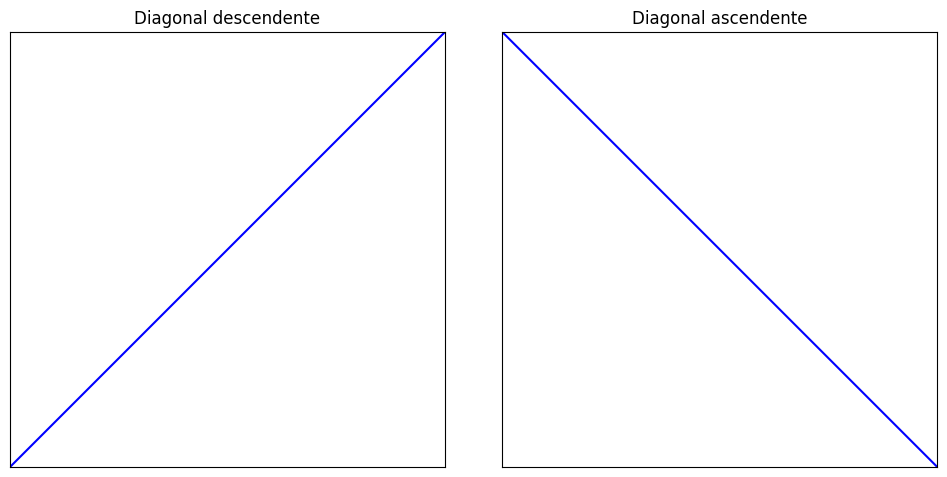

In [ ]:
# @title Crea gráfico signo de la covarianza
# Crear una nueva figura y ejes con dos subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Para el primer subgráfico
ax1.plot([0, 1], [0, 1], color='blue')  # Línea diagonal descendente
ax1.set_title('Diagonal descendente')

# Para el segundo subgráfico
ax2.plot([0, 1], [1, 0], color='blue')  # Línea diagonal ascendente
ax2.set_title('Diagonal ascendente')

# Ajustar los límites de los ejes para ambos subgráficos
for ax in (ax1, ax2):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', 'box')

# Mostrar el gráfico
plt.tight_layout()
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
plt.show()



## Propiedades de la covarianza


**Propiedades**. La covarianza es independiente del orden de las variables, no le afectan los cambios de origen, pero sí los de escala. Dadas $X$ e $Y$ variables tomadas sobre los mismos casos; las constantes a, b, c y d; y las variables transformadas $U=a+bX$ $V=c+dY$. Se cumplen las siguientes igualdades:



*   cov(X,Y) = cov(Y,X)
*   cov(U,Y) = cov(a+bX,Y) = b cov(X,Y)
*   cov(X,V) = cov(X,c+dY) = d cpv (X,Y)
*   cov(U,V) = cov(a+bX,c+dY) = bc cov (X,Y)



La **cuasicovarianza** se define de manera análoga a la cuasivarianza y resulta:


$$S_{X,Y}= \frac{1}{}N-1\sum_{i=1}^{N}(X_{i}-\bar{X})(Y_{i}-\bar{Y})=\frac{1}{N-1}\Big[  \sum_{i=1}^{N} (X_{i}Y_{i})-\frac{(\sum_{i=1}^{N}X_{i})(\sum_{i=1}^{N}Y_{i})}{N} \Big] = \frac{N}{N-1}S_{X,Y}$$



## Regresión Lineal

Sean las variables $X$ e $Y$ (de manera que $X_{i}$ e $Y_{i}$ son, respectivamente, los valores de $X$ e $Y$ en cada caso $i=1,...,N$), la **recta de regresión** $r_{Y|X}$ es la recta $Y^{*}=a+bX$ para la que es mínimo

$$\sum_{i=1}^{N}e_{i}^{2}=\sum_{i=1}^{N}(Y_{i}^{*}-Y_{i})^{2}=\sum_{i=1}^{N}(a+bX_{i}-Y_{i})^{2}$$

Esto se consigue tomando los valores

$$b=\frac{S_{X,Y}}{S_{X}^{2}},$$

y $$a=\bar{Y}-b\bar{X},$$

por lo tanto, $\bar{Y}=a+b\bar{X}$, esto es, la recta pasa por el punto $(\bar{X},\bar{Y}).$

Se denota $r_{Y|X}\equiv a+bX$. A $X$ se le denomina la **variaable explicaativa**, e $Y$ es la **variable explicada**.


**Ejercicio.**